# AMAZON SALES REPORT's DATA ANALYSIS
by : Al

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math

df = pd.read_csv (r"C:\Users\FARUQ\Downloads\archive\Amazon Sale Report.csv")
df.isnull().sum()
df.duplicated().sum()
df.info()

C:\Users\FARUQ\AppData\Local\Temp\ipykernel_22832\1456786248.py:8: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv (r"C:\Users\FARUQ\Downloads\archive\Amazon Sale Report.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

# A. Rumuskan Pertanyaan Bisnis
Instruksi: Tulis 3–5 pertanyaan bisnis terukur (contoh: berapa cancel rate? kategori mana paling
profitable?). Hubungkan ke keputusan nyata (stok, promosi, pengiriman).

## 1. Cancel Rate Bulanan

In [2]:
df['Status']

0                            Cancelled
1         Shipped - Delivered to Buyer
2                              Shipped
3                            Cancelled
4                              Shipped
                      ...             
128970                         Shipped
128971                         Shipped
128972                         Shipped
128973                         Shipped
128974                         Shipped
Name: Status, Length: 128975, dtype: object

In [3]:
persen_cancelled = (df['Status'] == 'Cancelled').sum() / len(df) * 100
print('presentase cancel :',persen_cancelled)

#presentase cancelnya ada di angka : 14.213607288234154%

presentase cancel : 14.213607288234154


## 2. Penjualan Produk Tertinggi

In [4]:
df['Category'].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

<Axes: xlabel='Category', ylabel='Amount'>

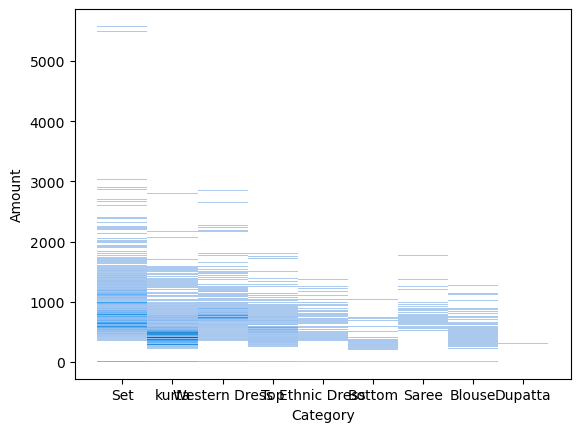

In [5]:
sns.histplot(data=df,x='Category',y='Amount')

In [6]:
df.groupby('Category')['Amount'].sum()

# paling banyak hasilnya ada di kurta

Category
Blouse             458408.18
Bottom             150667.98
Dupatta               915.00
Ethnic Dress       791217.66
Saree              123933.76
Set              39204124.03
Top               5347792.30
Western Dress    11216072.69
kurta            21299546.70
Name: Amount, dtype: float64

## 3. Channel Kontribusi Terbesar

In [7]:
df['Sales Channel ']

0         Amazon.in
1         Amazon.in
2         Amazon.in
3         Amazon.in
4         Amazon.in
            ...    
128970    Amazon.in
128971    Amazon.in
128972    Amazon.in
128973    Amazon.in
128974    Amazon.in
Name: Sales Channel , Length: 128975, dtype: object

In [8]:
df.groupby('Sales Channel ')['Amount'].sum()
# jadi yang paling banyak adalah Amazon

Sales Channel 
Amazon.in     78592678.3
Non-Amazon           0.0
Name: Amount, dtype: float64

## Hasil 
1. Cancel Rate Pesanan (14.21%)
2. Kategori Produk dengan Penjualan Tertinggi (Set & Kurta)
3. Kontribusi Penjualan per Sales Channel (Didominasi Amazon.in)


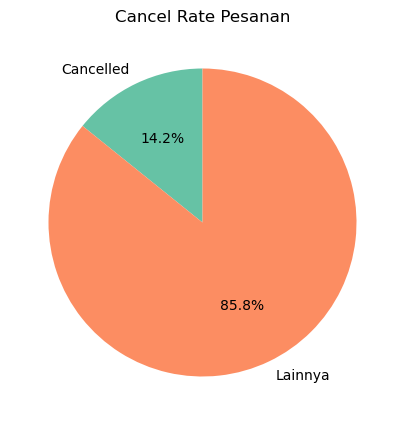

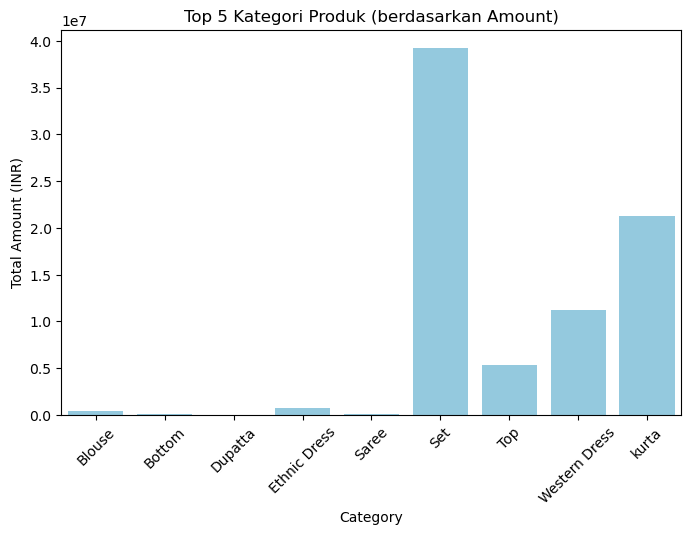

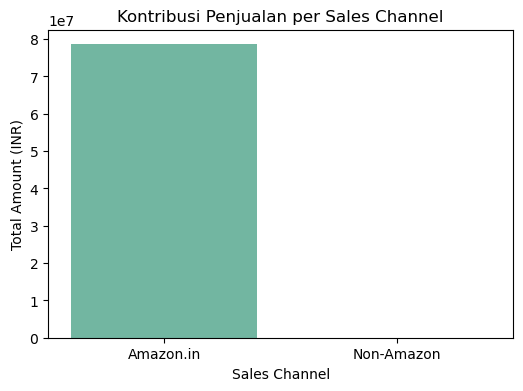

In [9]:

# 1. Visualisasi Cancel Rate (Pie)
cancel_counts = df['Status'].eq("Cancelled").sum()
non_cancel_counts = len(df) - cancel_counts

plt.figure(figsize=(5,5))
plt.pie([cancel_counts, non_cancel_counts], 
        labels=["Cancelled", "Lainnya"], 
        autopct="%.1f%%", startangle=90, colors=sns.color_palette("Set2"))
plt.title("Cancel Rate Pesanan")
plt.show()

cat_amount = df.groupby('Category')['Amount'].sum()

# 2. Visualisasi Top Kategori (Bar) → langsung dari groupby
plt.figure(figsize=(8,5))
sns.barplot(x=cat_amount.index, y=cat_amount.values, color="skyblue")  # cukup 1 warna
plt.title("Top 5 Kategori Produk (berdasarkan Amount)")
plt.ylabel("Total Amount (INR)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

# 3. Visualisasi Sales Channel (Bar)
channel_amount = df.groupby('Sales Channel ')['Amount'].sum().sort_values(ascending=False)


plt.figure(figsize=(6,4))
sns.barplot(x=channel_amount.index, 
            y=channel_amount.values, 
            hue=channel_amount.index,  # pakai hue = x
            palette="Set2", 
            legend=False)
plt.title("Kontribusi Penjualan per Sales Channel")
plt.ylabel("Total Amount (INR)")
plt.xlabel("Sales Channel")
plt.xticks(rotation=0)
plt.show()


# B. Audit Data

1. Jumlah Baris dan Kolom
Hitung jumlah baris dan kolom dalam dataset.
2. Rentang Tanggal
Tentukan rentang tanggal yang terdapat dalam kolom 'Date'. Tanggal pertama dan terakhir.
3. Jumlah Order Unik
Hitung jumlah order unik berdasarkan kolom 'Order ID'.
4. Proporsi Nilai Hilang Per Kolom
Hitung proporsi nilai hilang (missing values) untuk setiap kolom dalam dataset dan tampilkan dalam bentuk persentase.

## 1. Jumlah Baris dan Kolom

In [10]:
baris = df.shape[0]
kolom = df.shape[1]
print (baris, kolom)

#jumlah baris :  128975  jumlah kolom : 24

128975 24


## 2. Rentang Tanggal

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')
range_tanggal = df['Date'].max() - df['Date'].min()
print(range_tanggal)

# Rentang tanggal : 90 days

90 days 00:00:00


## 3. Jumlah Order Unik

In [12]:
df['Order ID'].unique()

array(['405-8078784-5731545', '171-9198151-1101146',
       '404-0687676-7273146', ..., '407-9547469-3152358',
       '402-6184140-0545956', '408-7436540-8728312'], dtype=object)

In [13]:
unik = df['Order ID'].nunique()

print(unik)

120378


## 4. Proporsi Nilai Hilang Per Kolom

In [14]:
nilai_hilang = df.isnull().mean()*100
print (nilai_hilang)

# dibawah ini adalah proporsi missing value per kolom

index                  0.000000
Order ID               0.000000
Date                   0.000000
Status                 0.000000
Fulfilment             0.000000
Sales Channel          0.000000
ship-service-level     0.000000
Style                  0.000000
SKU                    0.000000
Category               0.000000
Size                   0.000000
ASIN                   0.000000
Courier Status         5.328164
Qty                    0.000000
currency               6.043807
Amount                 6.043807
ship-city              0.025586
ship-state             0.025586
ship-postal-code       0.025586
ship-country           0.025586
promotion-ids         38.110487
B2B                    0.000000
fulfilled-by          69.546811
Unnamed: 22           38.030626
dtype: float64


In [15]:
total_nilai_hilang = df.isnull().sum().sum()
rata2_nilai_hilang = df.isnull().mean().mean()*100
print (total_nilai_hilang,' ',rata2_nilai_hilang)

#total nilai hilang :210495
#rata2 nilai hilang : 6.800251986819152%

210495   6.800251986819152


## Hasil

In [16]:
print (
    'Nomer 1', 
    '\nJumlah Baris : ', baris,
    '\nJumlah Kolom : ',kolom,
    '\n\nNomer 2',
    '\nRentang Tanggal : ',range_tanggal,
    '\n\nNomer 3',
    '\nJumlah Order Unik : ',unik,
    '\n\nNomer 4',
    '\nJumlah Nilai Hilang : ',total_nilai_hilang,
    '\nRata-rata Nilai Hilang : ', rata2_nilai_hilang,'%',
)

Nomer 1 
Jumlah Baris :  128975 
Jumlah Kolom :  24 

Nomer 2 
Rentang Tanggal :  90 days 00:00:00 

Nomer 3 
Jumlah Order Unik :  120378 

Nomer 4 
Jumlah Nilai Hilang :  210495 
Rata-rata Nilai Hilang :  6.800251986819152 %


# C. Cleansing Data
1. Buang Kolom "Unnamed: 22"
2. Strip Spasi pada Nama Kolom "Sales Channel"
3. Parse Tanggal pada Kolom "Date"
4. Normalisasi Kapitalisasi pada Kolom "Category" dan "Size"
5. Tangani Nilai Hilang pada Kolom "Courier Status"
6. Pastikan Nilai pada Kolom "Qty" ≥ 0
7. Pastikan Nilai pada Kolom "Amount" ≥ 0

## 1. Buang Kolom "Unnamed: 22"

In [17]:
df.pop('Unnamed: 22') #mwnghapus kolom
df.dtypes #menampilakn ulang data

index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
promotion-ids                 object
B2B                             bool
fulfilled-by                  object
dtype: object

## 2. Hapus Strip Spasi pada Nama Kolom "Sales Channel"

In [18]:
df['Sales Channel'] = df['Sales Channel '] #mengubah menjadi tanpa spasi
df = df.rename(columns={" Sales Channel ": "Sales Channel"})

print(df['Sales Channel'])

0         Amazon.in
1         Amazon.in
2         Amazon.in
3         Amazon.in
4         Amazon.in
            ...    
128970    Amazon.in
128971    Amazon.in
128972    Amazon.in
128973    Amazon.in
128974    Amazon.in
Name: Sales Channel, Length: 128975, dtype: object


## 3. Parse Tanggal pada Kolom "Date"

In [19]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Sales Channel
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,Amazon.in
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,Amazon.in
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,Amazon.in
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,Amazon.in
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,Amazon.in


In [20]:
df['Date'] =  pd.to_datetime(df['Date'], format='%m-%d-%y')
df.dtypes

index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
promotion-ids                 object
B2B                             bool
fulfilled-by                  object
Sales Channel                 object
dtype: object

## 4. Normalisasi Kapitalisasi pada Kolom "Category" dan "Size"

In [21]:
#awal
df['Category'].head

<bound method NDFrame.head of 0                   Set
1                 kurta
2                 kurta
3         Western Dress
4                   Top
              ...      
128970            kurta
128971              Set
128972    Western Dress
128973              Set
128974              Set
Name: Category, Length: 128975, dtype: object>

In [22]:
df['Size'].head

<bound method NDFrame.head of 0           S
1         3XL
2          XL
3           L
4         3XL
         ... 
128970     XL
128971      M
128972    XXL
128973     XS
128974      S
Name: Size, Length: 128975, dtype: object>

In [23]:
df['Category'] = df['Category'].str.title()
df['Size'] = df['Size'].str.upper()

In [24]:
df['Category'].head

<bound method NDFrame.head of 0                   Set
1                 Kurta
2                 Kurta
3         Western Dress
4                   Top
              ...      
128970            Kurta
128971              Set
128972    Western Dress
128973              Set
128974              Set
Name: Category, Length: 128975, dtype: object>

In [25]:
df['Size'].head

<bound method NDFrame.head of 0           S
1         3XL
2          XL
3           L
4         3XL
         ... 
128970     XL
128971      M
128972    XXL
128973     XS
128974      S
Name: Size, Length: 128975, dtype: object>

## 5. Tangani Nilai Hilang pada Kolom "Courier Status"

In [26]:
df['Courier Status'].head

<bound method NDFrame.head of 0             NaN
1         Shipped
2         Shipped
3             NaN
4         Shipped
           ...   
128970    Shipped
128971    Shipped
128972    Shipped
128973    Shipped
128974    Shipped
Name: Courier Status, Length: 128975, dtype: object>

In [27]:
df['Courier Status'].isnull().sum() #awal

np.int64(6872)

In [28]:
df['Courier Status'] = df['Courier Status'].fillna(0) #mengganti NaN dengan 0)
df['Courier Status'].isnull().sum() #hasil

np.int64(0)

## 6. Pastikan Nilai pada Kolom "Qty" ≥ 0

In [29]:
df['Qty'].head

<bound method NDFrame.head of 0         0
1         1
2         1
3         0
4         1
         ..
128970    1
128971    1
128972    1
128973    1
128974    1
Name: Qty, Length: 128975, dtype: int64>

In [30]:
( df['Qty'] < 0).any()

#np.false menandakan tidak ada angka dibawah 0

np.False_

## 7 Pastikan Nilai pada Kolom "Amount" ≥ 0

In [31]:
df['Amount'].head

<bound method NDFrame.head of 0          647.62
1          406.00
2          329.00
3          753.33
4          574.00
           ...   
128970     517.00
128971     999.00
128972     690.00
128973    1199.00
128974     696.00
Name: Amount, Length: 128975, dtype: float64>

In [32]:
( df['Amount'] < 0).any()

#np.false menandakan tidak ada angka dibawah 0

np.False_

# D. Standardization Status (Kanonik)
Instruksi: Petakan 'Status' mentah ke status kanonik: Delivered, Returned, Cancelled, In-Transit, Pending. Dokumentasikan mapping.

In [33]:
df['Status'].head(15) #menampilkan 15 baris teratas

0                        Cancelled
1     Shipped - Delivered to Buyer
2                          Shipped
3                        Cancelled
4                          Shipped
5                          Shipped
6                          Shipped
7     Shipped - Delivered to Buyer
8                        Cancelled
9                          Shipped
10                         Shipped
11                         Shipped
12    Shipped - Delivered to Buyer
13                         Shipped
14    Shipped - Delivered to Buyer
Name: Status, dtype: object

In [34]:
df['Status_lama'] = df['Status'] #buat mapping

In [35]:
status_map = {
    'Cancelled': 'Cancelled',
    'Shipped - Delivered to Buyer': 'Delivered',
    'Shipped - Returned to Seller': 'Returned',
    'Pending' : 'Pending',
    'Transit' : 'Transit'
} #diganti semua

df['Status_baru'] = df['Status'].replace(status_map)

In [36]:
df['Status_baru'].head(15) #sudah diganti

0     Cancelled
1     Delivered
2       Shipped
3     Cancelled
4       Shipped
5       Shipped
6       Shipped
7     Delivered
8     Cancelled
9       Shipped
10      Shipped
11      Shipped
12    Delivered
13      Shipped
14    Delivered
Name: Status_baru, dtype: object

## Dokumentasi Mapping Status

In [37]:
mapping_table = pd.DataFrame(list(status_map.items()),
                             columns=['Status_lama', 'Status_baru'])
print(mapping_table)

                    Status_lama Status_baru
0                     Cancelled   Cancelled
1  Shipped - Delivered to Buyer   Delivered
2  Shipped - Returned to Seller    Returned
3                       Pending     Pending
4                       Transit     Transit


# E. Turunan 
1. Tambahkan kolom turunan : order_date,order_week,order_month
2. Hitung kolom : net_units,net_amount
3. Tampilkan cuplikan 10 baris.

## 1. Tambahkan kolom turunan

In [38]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')
df['Date'].head

<bound method NDFrame.head of 0        2022-04-30
1        2022-04-30
2        2022-04-30
3        2022-04-30
4        2022-04-30
            ...    
128970   2022-05-31
128971   2022-05-31
128972   2022-05-31
128973   2022-05-31
128974   2022-05-31
Name: Date, Length: 128975, dtype: datetime64[ns]>

In [39]:
df['week'] = df['Date'].dt.isocalendar().week #menguabh jadi format ISO week
print (df['week'])

0         17
1         17
2         17
3         17
4         17
          ..
128970    22
128971    22
128972    22
128973    22
128974    22
Name: week, Length: 128975, dtype: UInt32


In [40]:
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

print (df[['Order ID','year_month']])

                   Order ID year_month
0       405-8078784-5731545    2022-04
1       171-9198151-1101146    2022-04
2       404-0687676-7273146    2022-04
3       403-9615377-8133951    2022-04
4       407-1069790-7240320    2022-04
...                     ...        ...
128970  406-6001380-7673107    2022-05
128971  402-9551604-7544318    2022-05
128972  407-9547469-3152358    2022-05
128973  402-6184140-0545956    2022-05
128974  408-7436540-8728312    2022-05

[128975 rows x 2 columns]


## 2. Hitung kolom net_unit, net_amount

In [41]:
df[['Status','Qty','Amount']].head #awal

<bound method NDFrame.head of                               Status  Qty   Amount
0                          Cancelled    0   647.62
1       Shipped - Delivered to Buyer    1   406.00
2                            Shipped    1   329.00
3                          Cancelled    0   753.33
4                            Shipped    1   574.00
...                              ...  ...      ...
128970                       Shipped    1   517.00
128971                       Shipped    1   999.00
128972                       Shipped    1   690.00
128973                       Shipped    1  1199.00
128974                       Shipped    1   696.00

[128975 rows x 3 columns]>

In [42]:
status_map = {
    'Cancelled': 'Cancelled',
    'Shipped - Delivered to Buyer': 'Delivered',
    'Shipped - Returned to Seller': 'Returned',
    'Pending' : 'Pending',
    'Transit' : 'Transit'
} #diganti semua

df['Status'] = df['Status'].replace(status_map)

In [43]:
df['net_unit'] = df[df['Status'].str.strip().eq('Delivered')]['Qty']
df['net_unit'] = df['net_unit'].fillna(0)
print (df['net_unit'])

0         0.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
128970    0.0
128971    0.0
128972    0.0
128973    0.0
128974    0.0
Name: net_unit, Length: 128975, dtype: float64


In [44]:
df['net_amount'] = df[df['Status'].eq('Delivered')]['Amount']
df['net_amount'] = df['net_amount'].fillna(0)
print (df['net_amount'])

0           0.0
1         406.0
2           0.0
3           0.0
4           0.0
          ...  
128970      0.0
128971      0.0
128972      0.0
128973      0.0
128974      0.0
Name: net_amount, Length: 128975, dtype: float64


In [45]:
df[['Status','net_unit','net_amount']].head #hasil

<bound method NDFrame.head of            Status  net_unit  net_amount
0       Cancelled       0.0         0.0
1       Delivered       1.0       406.0
2         Shipped       0.0         0.0
3       Cancelled       0.0         0.0
4         Shipped       0.0         0.0
...           ...       ...         ...
128970    Shipped       0.0         0.0
128971    Shipped       0.0         0.0
128972    Shipped       0.0         0.0
128973    Shipped       0.0         0.0
128974    Shipped       0.0         0.0

[128975 rows x 3 columns]>

## 3. Tampilkan cuplikan 10 baris

In [46]:
df.head(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,fulfilled-by,Sales Channel,Status_lama,Status_baru,week,month,year,year_month,net_unit,net_amount
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,Easy Ship,Amazon.in,Cancelled,Cancelled,17,4,2022,2022-04,0.0,0.0
1,1,171-9198151-1101146,2022-04-30,Delivered,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,Kurta,...,Easy Ship,Amazon.in,Shipped - Delivered to Buyer,Delivered,17,4,2022,2022-04,1.0,406.0
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,Kurta,...,NaN,Amazon.in,Shipped,Shipped,17,4,2022,2022-04,0.0,0.0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,Easy Ship,Amazon.in,Cancelled,Cancelled,17,4,2022,2022-04,0.0,0.0
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,NaN,Amazon.in,Shipped,Shipped,17,4,2022,2022-04,0.0,0.0
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,NaN,Amazon.in,Shipped,Shipped,17,4,2022,2022-04,0.0,0.0
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,NaN,Amazon.in,Shipped,Shipped,17,4,2022,2022-04,0.0,0.0
7,7,406-7807733-3785945,2022-04-30,Delivered,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,Kurta,...,Easy Ship,Amazon.in,Shipped - Delivered to Buyer,Delivered,17,4,2022,2022-04,1.0,399.0
8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,NaN,Amazon.in,Cancelled,Cancelled,17,4,2022,2022-04,0.0,0.0
9,9,402-4393761-0311520,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,Kurta,...,NaN,Amazon.in,Shipped,Shipped,17,4,2022,2022-04,0.0,0.0


# F. KPI
1. GMV (Gross Merchandise Value): Total nilai penjualan (jumlah dari kolom 'Amount').
2. Orders: Jumlah pesanan unik berdasarkan 'Order ID'.
3. Units: Total unit yang terjual (jumlah dari kolom 'Qty').
4. AOV (Average Order Value): GMV dibagi dengan jumlah pesanan.
5. ASP (Average Selling Price): GMV dibagi dengan jumlah unit.
6. Delivery Rate: Persentase pesanan yang selesai dengan status 'Completed'.
7. Return Rate: Persentase pesanan yang dikembalikan dengan status 'Returned'.
8. Cancel Rate: Persentase pesanan yang dibatalkan dengan status 'Canceled'.

## 1. Gross Merchandise Value (GMV)

In [47]:
def gmv (data) :
    return df['Amount'].sum()
gmv('Amount')

#GMV : 78592678.29999998

np.float64(78592678.29999998)

## 2. Units

In [48]:
def units (data) :
    return df['Qty'].sum()
units('Qty')

#Units : 116649

np.int64(116649)

## 3. Orders

In [49]:
def orders (data) :
    return df['Qty'].count()
orders('Qty')

#Orders : 120378


np.int64(128975)

## 4. Average Order Value (AOV)

In [50]:
def aov(gmv_value, orders_value):
    if orders_value != 0:  # Cek apakah orders_value 0
        return gmv_value / orders_value
    else:
        return 0  # Kalo 0, jangan dibagi
aov(gmv('Amount'),orders('Qty'))

#a = gmv
#b = orders

#aov = 609.3636619499902

np.float64(609.3636619499902)

## 5. Average Selling Price (ASP)

In [51]:
def asp(a,b):
    asp = a/b
asp(gmv('Amount'),units('Qty'))

#a = gmv
#b = units

#ASP : 673.7535538238646

## 6,7,8. Delivery,Shipped,Cancel Rate

In [52]:
def delivery (data) : 
    return(df['Status'].str.contains('Delivered').sum())/len(df)*100
def shipped (data):
    return (df['Status'].str.contains('Shipped').sum())/len(df)*100
def cancel (data) :
    return (df['Status'].str.contains('Cancelled').sum())/len(df)*100

print (
    shipped('Status'),
    delivery('Status'),
    cancel('Status')
)

61.232021709633656 22.305873231246366 14.213607288234154


## Hasil

In [53]:
print (
    'Nomer 1 :',gmv,
    '\nNomer 2 :', units,
    '\nNomer 3 :', orders,
    '\nNomer 4 :', aov,
    '\nNomer 5 :', asp,
    '\nNomer 6 :', shipped,
    '\nNomer 7 :', delivery,
    '\nNomer 8 :', cancel
)

Nomer 1 : <function gmv at 0x0000028814CBF740> 
Nomer 2 : <function units at 0x0000028814CBFD80> 
Nomer 3 : <function orders at 0x00000288150D8400> 
Nomer 4 : <function aov at 0x00000288150D8540> 
Nomer 5 : <function asp at 0x00000288150D8860> 
Nomer 6 : <function shipped at 0x00000288150D8EA0> 
Nomer 7 : <function delivery at 0x00000288150D8CC0> 
Nomer 8 : <function cancel at 0x00000288150D8F40>


# G. Time Agregation

Output:
1. Tabel agregasi harian.
2. Grafik garis terpisah untuk GMV harian dan Orders harian.
3. Grafik garis untuk Delivery vs Return vs Cancel Rate per minggu.

## 1. Tabel Agregasi Harian

In [54]:
daily_agg = df.groupby(df['Date']).agg(
    GMV=('Amount', 'sum'),
    Orders=('Order ID', 'nunique'),
    Units=('Qty', 'sum'),
    DeliveryRate=('Status', lambda x: (x == 'Shipped - Delivered to Buyer').mean()),
    ReturnRate=('Status', lambda x: (x == 'Shipped - Returned to Seller').mean()),
    CancelRate=('Status', lambda x: (x == 'Cancelled').mean())
).reset_index()

print(daily_agg)

         Date         GMV  Orders  Units  DeliveryRate  ReturnRate  CancelRate
0  2022-03-31   101683.85     158    156           0.0         0.0    0.105263
1  2022-04-01   865478.60    1363   1319           0.0         0.0    0.159184
2  2022-04-02   913101.53    1452   1408           0.0         0.0    0.164630
3  2022-04-03  1011763.38    1565   1544           0.0         0.0    0.142519
4  2022-04-04   882059.17    1376   1331           0.0         0.0    0.135154
..        ...         ...     ...    ...           ...         ...         ...
86 2022-06-25   654234.58     977    940           0.0         0.0    0.125731
87 2022-06-26   773610.02    1116   1122           0.0         0.0    0.130579
88 2022-06-27   714124.67    1042   1023           0.0         0.0    0.126013
89 2022-06-28   772085.53    1130   1104           0.0         0.0    0.133884
90 2022-06-29   411530.76     606    627           0.0         0.0    0.047112

[91 rows x 7 columns]


## 2. Grafik GMV dan Orders harian

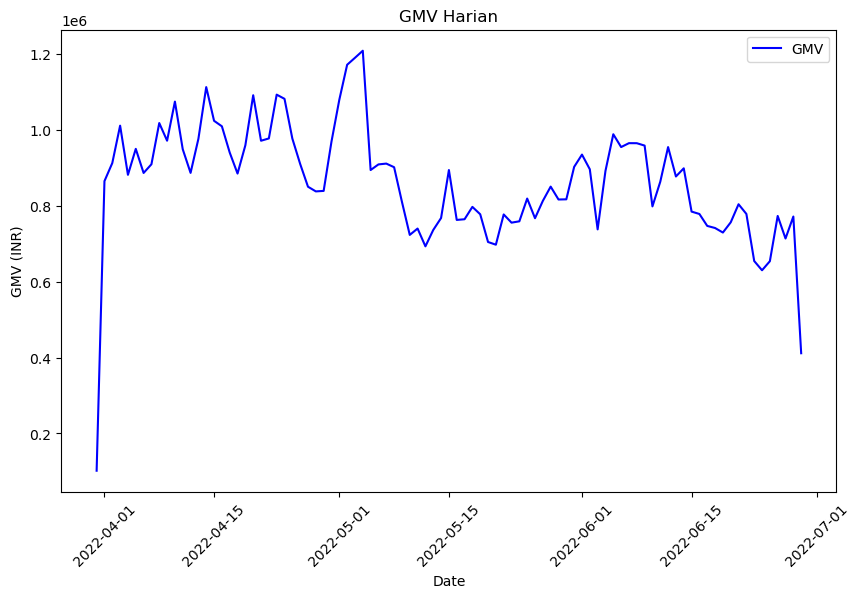

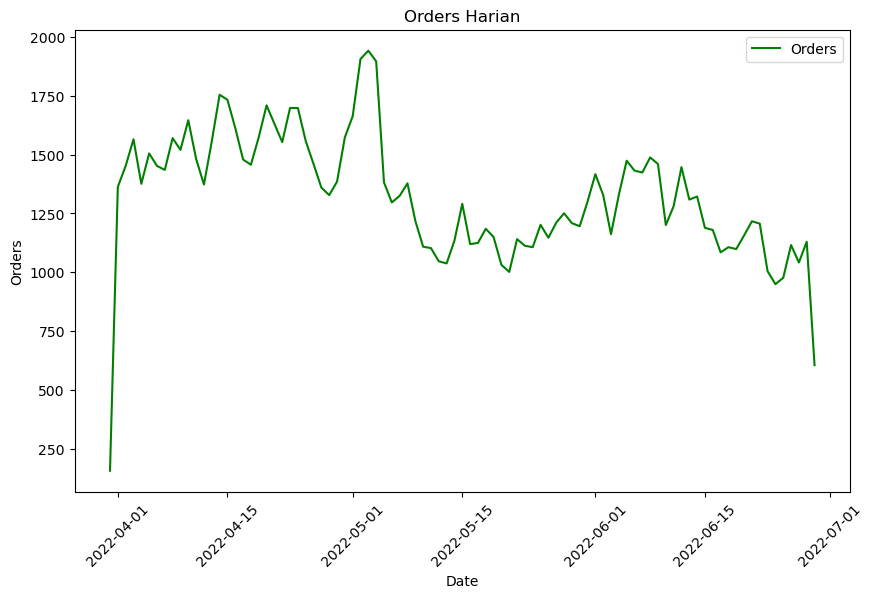

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(daily_agg['Date'], daily_agg['GMV'], label='GMV', color='blue')
plt.xlabel('Date')
plt.ylabel('GMV (INR)')
plt.title('GMV Harian')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(daily_agg['Date'], daily_agg['Orders'], label='Orders', color='green')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.title('Orders Harian')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## 3. Grafik Rate per Pekan

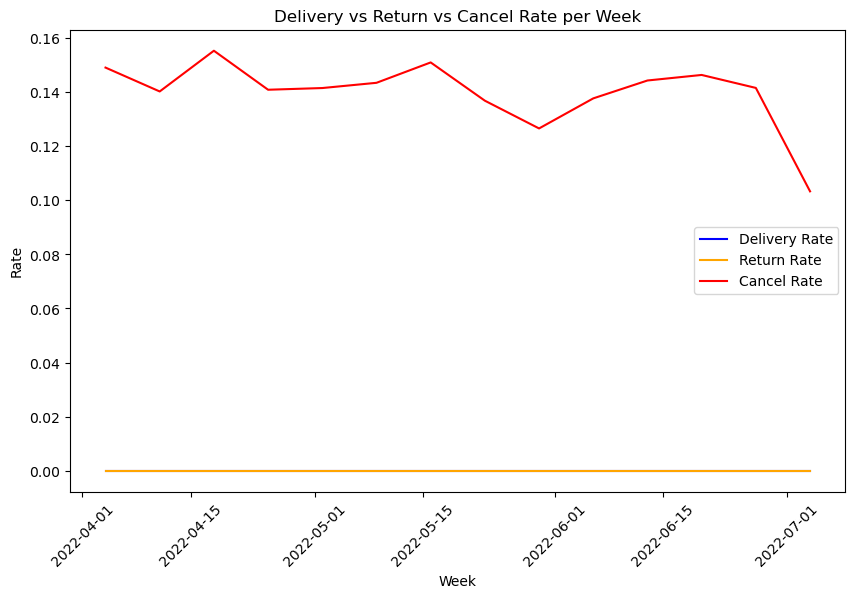

In [56]:
weekly_agg = df.resample('W-Mon', on='Date').agg(
    DeliveryRate=('Status', lambda x: (x == 'Shipped - Delivered to Buyer').mean()),
    ReturnRate=('Status', lambda x: (x == 'Shipped - Returned to Seller').mean()),
    CancelRate=('Status', lambda x: (x == 'Cancelled').mean())
).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(weekly_agg['Date'], weekly_agg['DeliveryRate'], label='Delivery Rate', color='blue')
plt.plot(weekly_agg['Date'], weekly_agg['ReturnRate'], label='Return Rate', color='orange')
plt.plot(weekly_agg['Date'], weekly_agg['CancelRate'], label='Cancel Rate', color='red')
plt.xlabel('Week')
plt.ylabel('Rate')
plt.title('Delivery vs Return vs Cancel Rate per Week')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Hasil

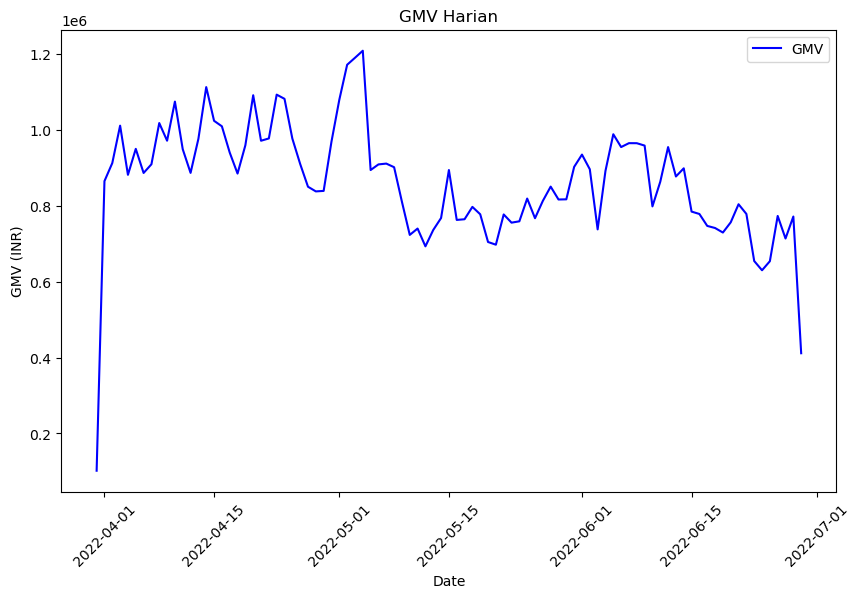

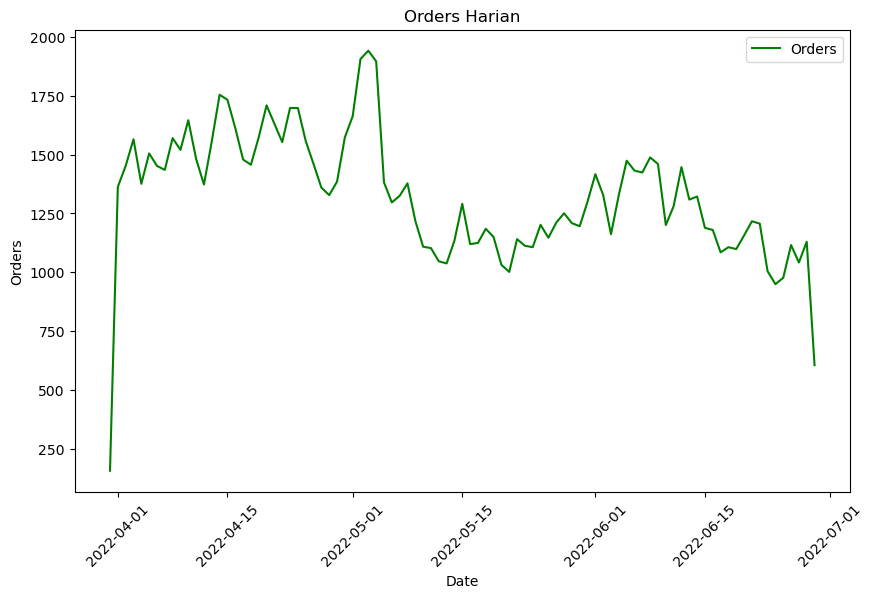

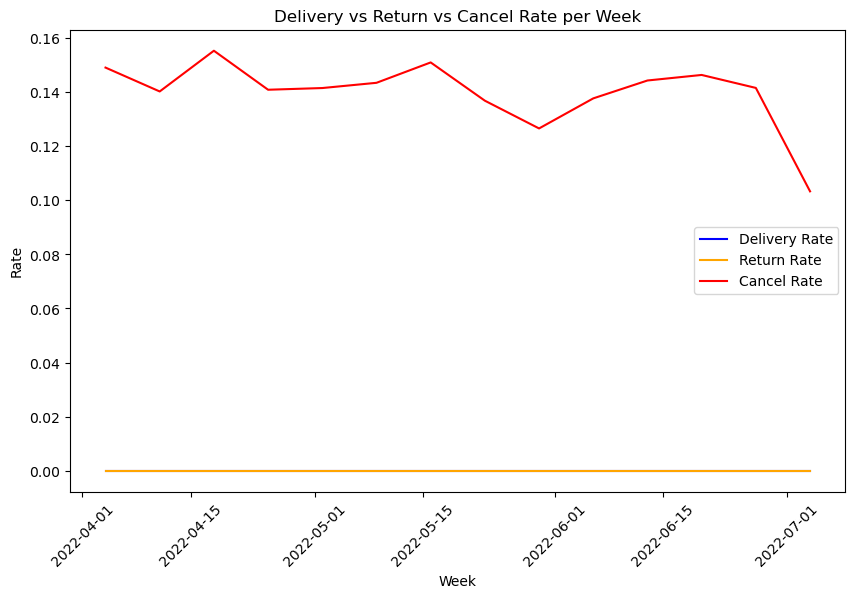

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(daily_agg['Date'], daily_agg['GMV'], label='GMV', color='blue')
plt.xlabel('Date')
plt.ylabel('GMV (INR)')
plt.title('GMV Harian')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(daily_agg['Date'], daily_agg['Orders'], label='Orders', color='green')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.title('Orders Harian')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(weekly_agg['Date'], weekly_agg['DeliveryRate'], label='Delivery Rate', color='blue')
plt.plot(weekly_agg['Date'], weekly_agg['ReturnRate'], label='Return Rate', color='orange')
plt.plot(weekly_agg['Date'], weekly_agg['CancelRate'], label='Cancel Rate', color='red')
plt.xlabel('Week')
plt.ylabel('Rate')
plt.title('Delivery vs Return vs Cancel Rate per Week')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# H. Channel Analysis
Output: Tabel per channel + grafik batang bertumpuk kontribusi GMV per channel

## Tabel

In [58]:
df['Sales Channel'].head

<bound method NDFrame.head of 0         Amazon.in
1         Amazon.in
2         Amazon.in
3         Amazon.in
4         Amazon.in
            ...    
128970    Amazon.in
128971    Amazon.in
128972    Amazon.in
128973    Amazon.in
128974    Amazon.in
Name: Sales Channel, Length: 128975, dtype: object>

In [59]:
analisa = {
    'Sales Channel': ['Amazon.in'],
    'GMV (INR)': [gmv],
    'Orders': [orders],
    'AOV (INR)': [aov],
    'Delivery Rate': [delivery],
    'Shipped Rate': [shipped],
    'Cancel Rate': [cancel]
}

df2 = pd.DataFrame(analisa)

print(df2)

  Sales Channel                             GMV (INR)  \
0     Amazon.in  <function gmv at 0x0000028814CBF740>   

                                    Orders  \
0  <function orders at 0x00000288150D8400>   

                              AOV (INR)  \
0  <function aov at 0x00000288150D8540>   

                               Delivery Rate  \
0  <function delivery at 0x00000288150D8CC0>   

                               Shipped Rate  \
0  <function shipped at 0x00000288150D8EA0>   

                               Cancel Rate  
0  <function cancel at 0x00000288150D8F40>  


## Hasil

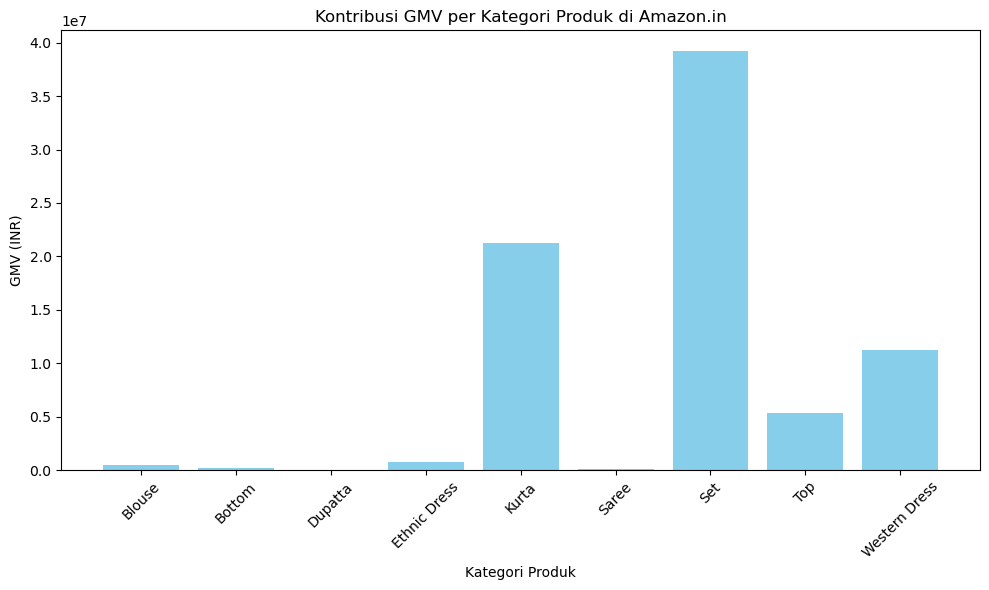

In [60]:
# Mengambil data untuk Amazon.in saja
amazon_data = df[df['Sales Channel'] == 'Amazon.in']

# Mengelompokkan data berdasarkan kategori produk dan menghitung total GMV
category_gmv = amazon_data.groupby('Category')['Amount'].sum().reset_index()

# Membuat grafik batang bertumpuk
plt.figure(figsize=(10, 6))
plt.bar(category_gmv['Category'], category_gmv['Amount'], color='skyblue')
plt.title('Kontribusi GMV per Kategori Produk di Amazon.in')
plt.xlabel('Kategori Produk')
plt.ylabel('GMV (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# I. Fullfilment Performance
Output:
- Tabel metrik per fulfilment.
- Tabel Fulfilment x StatusKanonik.

## 1. Tabel Fulfilment

In [61]:
df['Fulfilment'].head #cek dari kolom fulfilment

<bound method NDFrame.head of 0         Merchant
1         Merchant
2           Amazon
3         Merchant
4           Amazon
            ...   
128970      Amazon
128971      Amazon
128972      Amazon
128973      Amazon
128974      Amazon
Name: Fulfilment, Length: 128975, dtype: object>

In [62]:
df['Fulfilment'].nunique() #cek apakah ada yang lain

2

In [63]:
amazon_fulfilment = df[df['Fulfilment'] == 'Amazon'] #diisi oleh amazon
merchant_fulfilment = df[df['Fulfilment'] == 'Merchant'] #diisi oleh merchant

#memasukkan data dari amazon
amazon_gmv =gmv(amazon_fulfilment)
amazon_orders = len(amazon_fulfilment)
amazon_units = units(amazon_fulfilment)
amazon_delivery = delivery(amazon_fulfilment)
amazon_shipped = shipped(amazon_fulfilment)
amazon_cancel = cancel(amazon_fulfilment)

#memasukkan data dari merchant
merchant_gmv =gmv(merchant_fulfilment)
merchant_orders = len(merchant_fulfilment)
merchant_units = units(merchant_fulfilment)
merchant_delivery = delivery(merchant_fulfilment)
merchant_shipped = shipped(merchant_fulfilment)
merchant_cancel = cancel(merchant_fulfilment)

data_fulfilment = { #memasukkan ke data
    'Fulfilment Type': ['Amazon Fulfilment', 'Merchant Fulfilment'],
    'GMV (INR)': [amazon_gmv, merchant_gmv],
    'Orders': [amazon_orders, merchant_orders],
    'Units': [amazon_units, merchant_units],
    'Delivery Rate (%)': [amazon_delivery, merchant_delivery],
    'Shipped Rate (%)': [amazon_shipped, merchant_shipped],
    'Cancelled Rate(%)': [amazon_cancel, merchant_cancel]
}

# Membuat DataFrame
table_fulfilment = pd.DataFrame(data_fulfilment)

## 2. Tabel Fulfilment x Kanonik

In [64]:
# Menghitung jumlah pesanan per status kanonik untuk Amazon
amazon_delivered = (amazon_fulfilment['Status_baru'] == 'Delivered').sum()
amazon_cancelled = (amazon_fulfilment['Status_baru'] == 'Cancelled').sum()
amazon_returned = (amazon_fulfilment['Status_baru'] == 'Returned').sum()
amazon_pending = (amazon_fulfilment['Status_baru'] == 'Pending').sum()
amazon_transit = (amazon_fulfilment['Status_baru'] == 'Transit').sum()

# Menghitung jumlah pesanan per status kanonik untuk Merchant
merchant_delivered = (merchant_fulfilment['Status_baru'] == 'Delivered').sum()
merchant_cancelled = (merchant_fulfilment['Status_baru'] == 'Cancelled').sum()
merchant_returned = (merchant_fulfilment['Status_baru'] == 'Returned').sum()
merchant_pending = (merchant_fulfilment['Status_baru'] == 'Pending').sum()
merchant_transit = (merchant_fulfilment['Status_baru'] == 'Transit').sum()

# Menyusun Tabel Fulfilment x Status Kanonik
status_kanonik_data = {
    'Fulfilment Type': ['Amazon Fulfilment', 'Merchant Fulfilment'],
    'Delivered': [amazon_delivered, merchant_delivered],
    'Cancelled': [amazon_cancelled, merchant_cancelled],
    'Returned': [amazon_returned, merchant_returned],
    'Pending': [amazon_pending, merchant_pending],
    'Transit': [amazon_transit, merchant_transit],
    'Total Orders': [amazon_fulfilment.shape[0], merchant_fulfilment.shape[0]]
}

# Membuat DataFrame dari data yang dihitung
status_kanonik_table = pd.DataFrame(status_kanonik_data)
status_kanonik_table.head()

,Fulfilment Type,Delivered,Cancelled,Returned,Pending,Transit,Total Orders
0,Amazon Fulfilment,0,11471,0,415,0,89698
1,Merchant Fulfilment,28769,6861,1953,243,0,39277


## Hasil

In [65]:
print(
    "Table Fulfilment",
    "\n", table_fulfilment, 
    "\n\n\n\n Table Fulfilment x Kanonik",
    "\n",status_kanonik_table)

Table Fulfilment 
        Fulfilment Type   GMV (INR)  Orders   Units  Delivery Rate (%)  \
0    Amazon Fulfilment  78592678.3   89698  116649          22.305873   
1  Merchant Fulfilment  78592678.3   39277  116649          22.305873   

   Shipped Rate (%)  Cancelled Rate(%)  
0         61.232022          14.213607  
1         61.232022          14.213607   



 Table Fulfilment x Kanonik 
        Fulfilment Type  Delivered  Cancelled  Returned  Pending  Transit  \
0    Amazon Fulfilment          0      11471         0      415        0   
1  Merchant Fulfilment      28769       6861      1953      243        0   

   Total Orders  
0         89698  
1         39277  


# J. Delivery Service
Output: Tabel komparatif + grafik batang AOV per level.

## 1. Analisi Standart vs Expedited

In [66]:
df['ship-service-level'].head #cek tabel ship service

<bound method NDFrame.head of 0          Standard
1          Standard
2         Expedited
3          Standard
4         Expedited
            ...    
128970    Expedited
128971    Expedited
128972    Expedited
128973    Expedited
128974    Expedited
Name: ship-service-level, Length: 128975, dtype: object>

In [67]:
service_standart = df[df['ship-service-level'] == 'Standart'] #diisi oleh standart
service_expedited = df[df['ship-service-level'] == 'Expedited'] #diisi oleh expedited

standart_aov = aov(gmv(service_standart),orders('Qty'))
standart_delivery = delivery(service_standart)
standart_shipped = shipped(service_standart)
standart_cancel = cancel(service_standart)

expedited_aov = aov(gmv(service_expedited),orders('Qty'))
expedited_delivery = delivery(service_expedited)
expedited_shipped = shipped(service_expedited)
expedited_cancel = cancel(service_expedited)

## 2. Tabel Standart vs Expedited

In [68]:
comparison_data = {
    'Metric': ['AOV (INR)', 'Delivery Rate (%)', 'Shipped', 'Cancelled'],
    'Standard': [standart_aov, standart_delivery, standart_shipped, standart_cancel],
    'Expedited': [expedited_aov, expedited_delivery, expedited_shipped, expedited_cancel]
}

# Membuat DataFrame untuk tabel komparatif
comparison_table = pd.DataFrame(comparison_data)

# Menampilkan Tabel
print(comparison_table)

              Metric    Standard   Expedited
0          AOV (INR)  609.363662  609.363662
1  Delivery Rate (%)   22.305873   22.305873
2            Shipped   61.232022   61.232022
3          Cancelled   14.213607   14.213607


## 3. Grafik Batang AOV

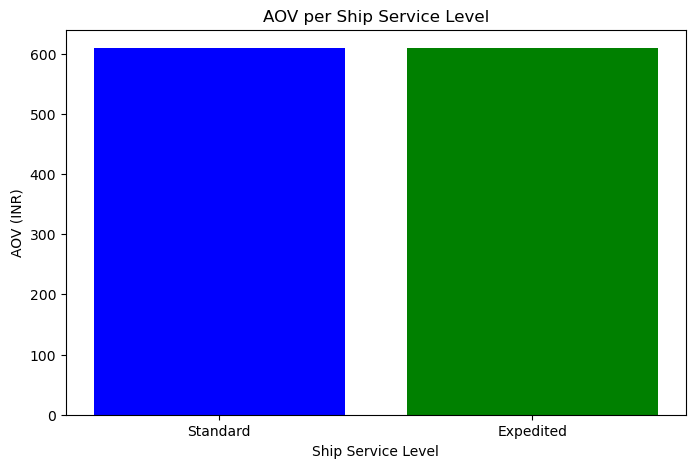

In [69]:
plt.figure(figsize=(8, 5))
plt.bar(['Standard', 'Expedited'], [standart_aov, expedited_aov], color=['blue', 'green'])
plt.xlabel('Ship Service Level')
plt.ylabel('AOV (INR)')
plt.title('AOV per Ship Service Level')
plt.show()

# K. Category
Output:
- Tabel: Category | GMV | Units | Share GMV | Return Rate | Cancel Rate.
- Grafik Pareto (GMV kumulatif vs kategori berurutan).

## 1. Membuat Tabel

In [70]:
df['Category'].head #cek data awal

<bound method NDFrame.head of 0                   Set
1                 Kurta
2                 Kurta
3         Western Dress
4                   Top
              ...      
128970            Kurta
128971              Set
128972    Western Dress
128973              Set
128974              Set
Name: Category, Length: 128975, dtype: object>

In [71]:
df['Category'].unique() #cek ada apa saja di category

array(['Set', 'Kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [72]:
df['Amount'] = df['Amount'].fillna(0)
df['Amount'].isnull().sum() #memastikan amount terisi semua

np.int64(0)

In [73]:
gmv_category = df.groupby('Category', as_index=False)[['Amount','Qty']].sum() #membuat grup berdasrakan jenis #membuat grup berdasrakan jenis
gmv_category['Share GMV'] = (gmv_category['Amount'] / gmv('Amount') )* 100
gmv_category = gmv_category.sort_values(by='Share GMV', ascending=False) #diurutin
gmv_category['Cumulative Share GMV'] = gmv_category['Share GMV'].cumsum()#kumulatif

# Tampilkan hasil dengan Category, Amount, dan Share GMV
print(gmv_category)

        Category       Amount    Qty  Share GMV  Cumulative Share GMV
6            Set  39204124.03  45289  49.882667             49.882667
4          Kurta  21299546.70  45045  27.101184             76.983851
8  Western Dress  11216072.69  13943  14.271142             91.254993
7            Top   5347792.30   9903   6.804441             98.059434
3   Ethnic Dress    791217.66   1053   1.006732             99.066166
0         Blouse    458408.18    863   0.583271             99.649437
1         Bottom    150667.98    398   0.191707             99.841145
5          Saree    123933.76    152   0.157691             99.998836
2        Dupatta       915.00      3   0.001164            100.000000


## 2. Grafik Pareto

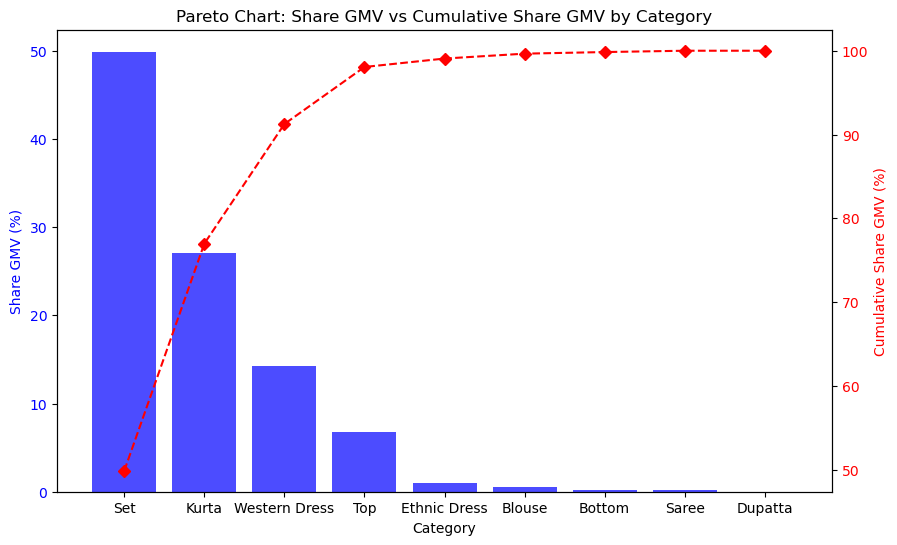

In [74]:
ig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Share GMV sebagai bar chart
ax1.bar(gmv_category['Category'], gmv_category['Share GMV'], color='b', alpha=0.7)
ax1.set_xlabel('Category')
ax1.set_ylabel('Share GMV (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Membuat sumbu kedua untuk Cumulative Share GMV
ax2 = ax1.twinx()
ax2.plot(gmv_category['Category'], gmv_category['Cumulative Share GMV'], color='r', marker='D', linestyle='--')
ax2.set_ylabel('Cumulative Share GMV (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Judul
plt.title('Pareto Chart: Share GMV vs Cumulative Share GMV by Category')
plt.show()

# L.  SKU & Style Deep Dive
Output: Dua tabel Top‑20 (SKU dan Style) + sparkline opsional

In [75]:
df[['SKU','Style']].head(20) #awal

,SKU,Style
0,SET389-KR-NP-S,SET389
1,JNE3781-KR-XXXL,JNE3781
2,JNE3371-KR-XL,JNE3371
3,J0341-DR-L,J0341
4,JNE3671-TU-XXXL,JNE3671
5,SET264-KR-NP-XL,SET264
6,J0095-SET-L,J0095
7,JNE3405-KR-S,JNE3405
8,SET200-KR-NP-A-XXXL,SET200
9,JNE3461-KR-XXL,JNE3461


## Tabel

In [76]:
#mirip dengan bagian K
gmv_sku = df.groupby('SKU', as_index=False)[['Amount','Qty']].sum() #membuat grup berdasrakan jenis #membuat grup berdasrakan jenis
gmv_sku['Share GMV'] = (gmv_sku['Amount'] / gmv('Amount') )* 100
gmv_sku = gmv_sku.sort_values(by='Share GMV', ascending=False) #diurutin
gmv_sku['Cumulative Share GMV'] = gmv_sku['Share GMV'].cumsum()#kumulatif

gmv_style = df.groupby('Style', as_index=False)[['Amount','Qty']].sum() #membuat grup berdasrakan jenis #membuat grup berdasrakan jenis
gmv_style['Share GMV'] = (gmv_style['Amount'] / gmv('Amount') )* 100
gmv_style = gmv_style.sort_values(by='Share GMV', ascending=False) #diurutin
gmv_style['Cumulative Share GMV'] = gmv_style['Share GMV'].cumsum()#kumulatif

df_sku = pd.DataFrame(gmv_sku) #memasukkan ke dataframe
df_style = pd.DataFrame(gmv_style)
df_sku.head(20),df_style.head(20)

(                  SKU     Amount  Qty  Share GMV  Cumulative Share GMV
 1346      J0230-SKD-M  527699.20  468   0.671436              0.671436
 4548     JNE3797-KR-L  524581.77  661   0.667469              1.338905
 1347      J0230-SKD-S  479937.14  421   0.610664              1.949569
 4549     JNE3797-KR-M  454290.16  561   0.578031              2.527600
 4550     JNE3797-KR-S  407302.57  503   0.518245              3.045845
 4551    JNE3797-KR-XL  332155.24  415   0.422629              3.468473
 1345      J0230-SKD-L  305616.95  272   0.388862              3.857335
 4552    JNE3797-KR-XS  303616.70  386   0.386317              4.243652
 6305  SET268-KR-NP-XL  284058.96  373   0.361432              4.605084
 4554  JNE3797-KR-XXXL  276375.80  353   0.351656              4.956740
 4553   JNE3797-KR-XXL  275966.88  359   0.351136              5.307875
 6304   SET268-KR-NP-S  267030.48  350   0.339765              5.647640
 1348     J0230-SKD-XL  259032.58  221   0.329589              5

# M. Size Curve
Output:
- Tabel Category x Size (Units & Share).
- Grafik batang per kategori.

In [77]:
df['Category'].unique() #cek ketersediaan awal

array(['Set', 'Kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [78]:
df['Size'].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', '5XL',
       'FREE'], dtype=object)

## Tabel Category x Size 

In [79]:
category_size = df.groupby(['Category','Size'], as_index=False)['Qty'].sum() #membuat grup berdasrakan jenis 
category_size ['Ratio'] = (category_size['Qty']/units('Qty'))*100 #menambahakan ratio
print (category_size)

         Category  Size   Qty     Ratio
0          Blouse  FREE   211  0.180885
1          Blouse     L   128  0.109731
2          Blouse     M   138  0.118304
3          Blouse     S   128  0.109731
4          Blouse    XL   116  0.099444
5          Blouse    XS    25  0.021432
6          Blouse   XXL   117  0.100301
7          Bottom   3XL    60  0.051436
8          Bottom     L    67  0.057437
9          Bottom     M    50  0.042864
10         Bottom     S    67  0.057437
11         Bottom    XL    64  0.054865
12         Bottom    XS    26  0.022289
13         Bottom   XXL    64  0.054865
14        Dupatta  FREE     3  0.002572
15   Ethnic Dress   3XL   160  0.137164
16   Ethnic Dress     L   170  0.145736
17   Ethnic Dress     M   167  0.143165
18   Ethnic Dress     S   163  0.139735
19   Ethnic Dress    XL   173  0.148308
20   Ethnic Dress    XS    77  0.066010
21   Ethnic Dress   XXL   143  0.122590
22          Kurta   3XL  5135  4.402095
23          Kurta   4XL   352  0.301760


## Grafik Batang

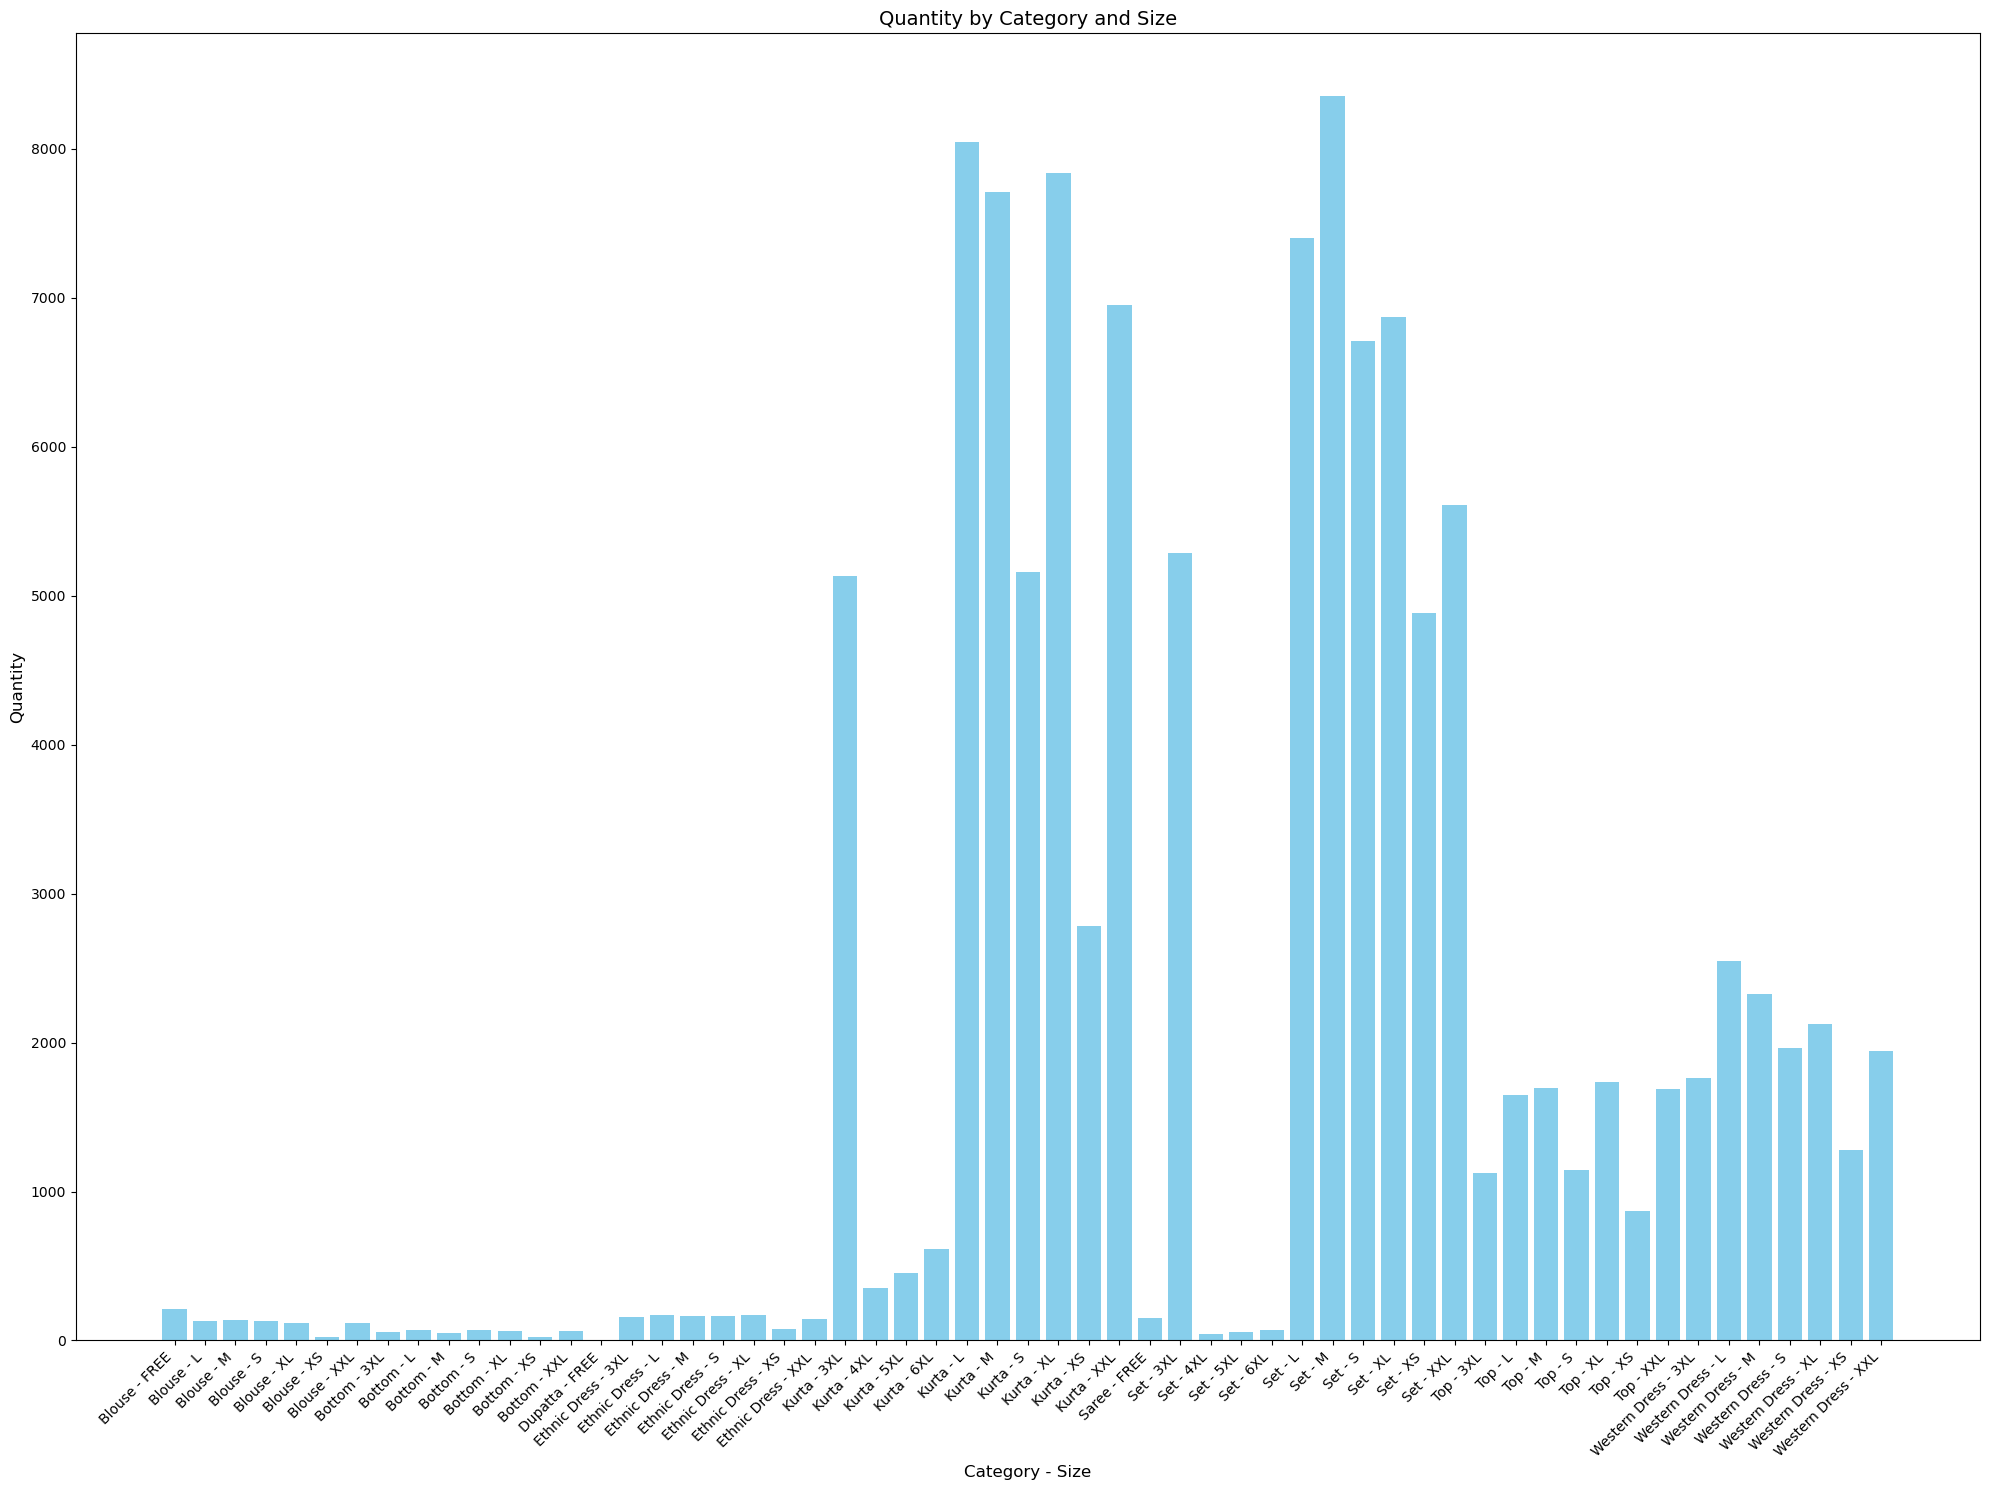

In [80]:

# Plotting the bar chart
plt.figure(figsize=(20,15))
plt.bar(category_size['Category'] + ' - ' + category_size['Size'], category_size['Qty'], color='skyblue')

# Adding title and labels
plt.title('Quantity by Category and Size', fontsize=14)
plt.xlabel('Category - Size', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

# N. Geografi (State & City)
Output:
- Tabel per state.
- 10 kota dengan GMV tertinggi (tabel).
- (Opsional) Peta panas jika ada lat/long; jika tidak, gunakan grafik batang.

In [81]:
df['ship-city'].nunique() #cek awal

8955

In [82]:
df['ship-state'].nunique()

69

## Tabel State

In [83]:
state_sum = df.groupby(['ship-city','ship-state'], as_index=False)[['Amount','Qty']].sum() #membuat grup berdasrakan jenis 
state_count = df.groupby(['ship-city', 'ship-state'], as_index=False)[['Qty']].count()
state = pd.merge(state_sum, state_count, on=['ship-city', 'ship-state'])
print(state)

                                           ship-city         ship-state  \
0     (Chikmagalur disterict).     (N.R pur thaluku)          KARNATAKA   
1                     (Via Cuncolim)Quepem,South Goa                GOA   
2                                         ,HYDERABAD          TELANGANA   
3                 ,raibarely road faizabad (Ayodhya)      UTTAR PRADESH   
4                                            ..katra    JAMMU & KASHMIR   
...                                              ...                ...   
9143                                        yavatmal        MAHARASHTRA   
9144                                          yazali  ARUNACHAL PRADESH   
9145                                        yellapur          KARNATAKA   
9146                                        zirakpur             PUNJAB   
9147                                            लखनऊ      UTTAR PRADESH   

      Amount  Qty_x  Qty_y  
0      389.0      1      1  
1     1163.0      1      1  
2      563.0

## 10 Besar

In [84]:
state_sort= state.sort_values(by='Amount', ascending=False)
state_sorting = pd.DataFrame(state_sort)
state_sorting.head(10)

,ship-city,ship-state,Amount,Qty_x,Qty_y
792,BENGALURU,KARNATAKA,6849664.99,10422,11217
2973,HYDERABAD,TELANGANA,4941131.82,7325,8065
4897,MUMBAI,MAHARASHTRA,3704461.80,5650,6126
5499,NEW DELHI,DELHI,3608136.83,5243,5785
1503,CHENNAI,TAMIL NADU,3098745.74,4937,5421
6285,PUNE,MAHARASHTRA,2338518.18,3533,3857
3800,KOLKATA,WEST BENGAL,1414978.87,2166,2381
2682,GURUGRAM,HARYANA,1221618.74,1734,1868
7757,THANE,MAHARASHTRA,1004355.29,1539,1701
4494,LUCKNOW,UTTAR PRADESH,933926.34,1283,1458


## Grafik

In [85]:
#jangan dioperasikan
[plt.figure(figsize=(10, 6))
plt.bar(state['ship-city'], state['Amount'], color='skyblue')
plt.xlabel('City')
plt.ylabel('GMV (Amount)')
plt.title('Top 10 Cities by GMV')
plt.xticks(rotation=45, ha='right')  # Rotasi label kota agar tidak tumpang tindih
plt.tight_layout()  # Menyesuaikan layout agar semua elemen terpasang dengan baik
plt.show()]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3807437954.py, line 2)

# O. Promotion
Output: Tabel Promoted vs Non‑Promoted + uplift (% perubahan AOV/Delivery Rate).

## Tabel

In [86]:
no_promosi = df['promotion-ids'].isnull().sum() # cek yg tidak terpromosikan
promosi = df['promotion-ids'].notnull().sum() #cek yg terpromosikan
print(no_promosi,promosi)

49153 79822


In [87]:
# Mengkategorikan 'Amount' menjadi 'Terisi' atau 'Kosong'
df['promotion_status'] = df['promotion-ids'].apply(lambda x: 'Terisi' if pd.notnull(x) else 'Kosong')

# Menampilkan DataFrame setelah ditambahkan kategori
print(df[['promotion-ids', 'promotion_status']].head(5))

                                       promotion-ids promotion_status
0                                                NaN           Kosong
1  Amazon PLCC Free-Financing Universal Merchant ...           Terisi
2       IN Core Free Shipping 2015/04/08 23-48-5-108           Terisi
3                                                NaN           Kosong
4                                                NaN           Kosong


In [88]:
promotion = df.groupby('promotion_status', as_index=False)['Amount'].sum() #membuat grup berdasrakan jenis #membuat grup berdasrakan jenis
print(promotion)

  promotion_status      Amount
0           Kosong  25004243.3
1           Terisi  53588435.0


In [89]:
promosi_ada = df[df['promotion_status'] == 'Terisi'] #diisi apabila ada isinya
promosi_non = df[df['promotion_status'] == 'Kosong'] #diisi apabial tidak ada isinya

ada_aov = aov(gmv(promosi_ada),units('Qty'))
ada_delivery = delivery(promosi_ada)
ada_shipped = shipped(promosi_ada)
ada_cancel = cancel(promosi_ada)

non_aov = aov(gmv(promosi_non),units('Qty'))
non_delivery = delivery(promosi_non)
non_shipped = shipped(promosi_non)
non_cancel = cancel(promosi_non)

promoted = { #masukin ke data
    'Metric': ['AOV (INR)', 'Delivery Rate (%)', 'Shipped', 'Cancelled'],
    'Promoted': [ada_aov, ada_delivery, ada_shipped, ada_cancel],
    'Non-Promoted': [non_aov, non_delivery, non_shipped, non_cancel]
}

promoted_table = pd.DataFrame(promoted)
promoted_table.head()

,Metric,Promoted,Non-Promoted
0,AOV (INR),673.753554,673.753554
1,Delivery Rate (%),22.305873,22.305873
2,Shipped,61.232022,61.232022
3,Cancelled,14.213607,14.213607


## Uplift

In [90]:
# Fungsi untuk menghitung uplift dan memberikan pesan jika tidak ada uplift
def calculate_uplift(promoted_value, non_promoted_value):
    if non_promoted_value == 0:
        return 0  # Hindari pembagian dengan 0
    uplift = ((promoted_value - non_promoted_value) / non_promoted_value) * 100
    if uplift == 0:
        return "No Uplift"  # Bisa diganti dengan NaN atau nilai lain jika uplift 0
    return uplift

# Menghitung uplift untuk AOV, Delivery Rate, Shipped, dan Cancelled
aov_uplift = calculate_uplift(ada_aov, non_aov)
delivery_uplift = calculate_uplift(ada_delivery, non_delivery)
shipped_uplift = calculate_uplift(ada_shipped, non_shipped)
cancel_uplift = calculate_uplift(ada_cancel, non_cancel)

# Menyusun DataFrame perbandingan antara Promoted dan Non-Promoted dengan uplift
promoted = {
    'Metric': ['AOV (INR)', 'Delivery Rate (%)', 'Shipped', 'Cancelled'],
    'Promoted': [ada_aov, ada_delivery, ada_shipped, ada_cancel],
    'Non-Promoted': [non_aov, non_delivery, non_shipped, non_cancel],
    'Uplift (%)': [aov_uplift, delivery_uplift, shipped_uplift, cancel_uplift]
}

promoted_table = pd.DataFrame(promoted)
promoted_table.head()


,Metric,Promoted,Non-Promoted,Uplift (%)
0,AOV (INR),673.753554,673.753554,No Uplift
1,Delivery Rate (%),22.305873,22.305873,No Uplift
2,Shipped,61.232022,61.232022,No Uplift
3,Cancelled,14.213607,14.213607,No Uplift


# P. B2B vs B2C
Output: Tabel komparatif + grafik batang AOV & Delivery Rate

In [91]:
df['B2B'].head #cek awal

<bound method NDFrame.head of 0         False
1         False
2          True
3         False
4         False
          ...  
128970    False
128971    False
128972    False
128973    False
128974    False
Name: B2B, Length: 128975, dtype: bool>

## Tambahan : Function delivery baru dari bagian F

In [92]:
def delivery_rate(df):
    return (df[df['Status'] == 'Delivered'].shape[0] / df.shape[0] if df.shape[0] != 0 else 0)*100

## Tabel Komparatif

In [93]:
b2b = df[df['B2B'] == True] #jika true maka menajdi b2b (bussiness to bussiness)
b2c = df[df['B2B'] == False] #jika false maka menajdi b2c (bussiness to consumer)

aov_b2b = gmv(b2b) / orders(b2b) if orders(b2b) != 0 else 0 #cek aov
aov_b2c = gmv(b2c) / orders(b2c) if orders(b2c) != 0 else 0

delivery_b2b = delivery_rate(b2b) # cek delivery
delivery_b2c = delivery_rate(b2c)

b2b_b2c = {
    'Metric': ['AOV (INR)', 'Delivery Rate (%)'],
    'B2B': [aov_b2b, delivery_b2b],
    'B2C': [aov_b2c, delivery_b2c]
}

b2bb2c_df = pd.DataFrame(b2b_b2c)
b2bb2c_df.head()

,Metric,B2B,B2C
0,AOV (INR),609.363662,609.363662
1,Delivery Rate (%),28.587830,22.263161


## Grafik Batang AOV & Delivery

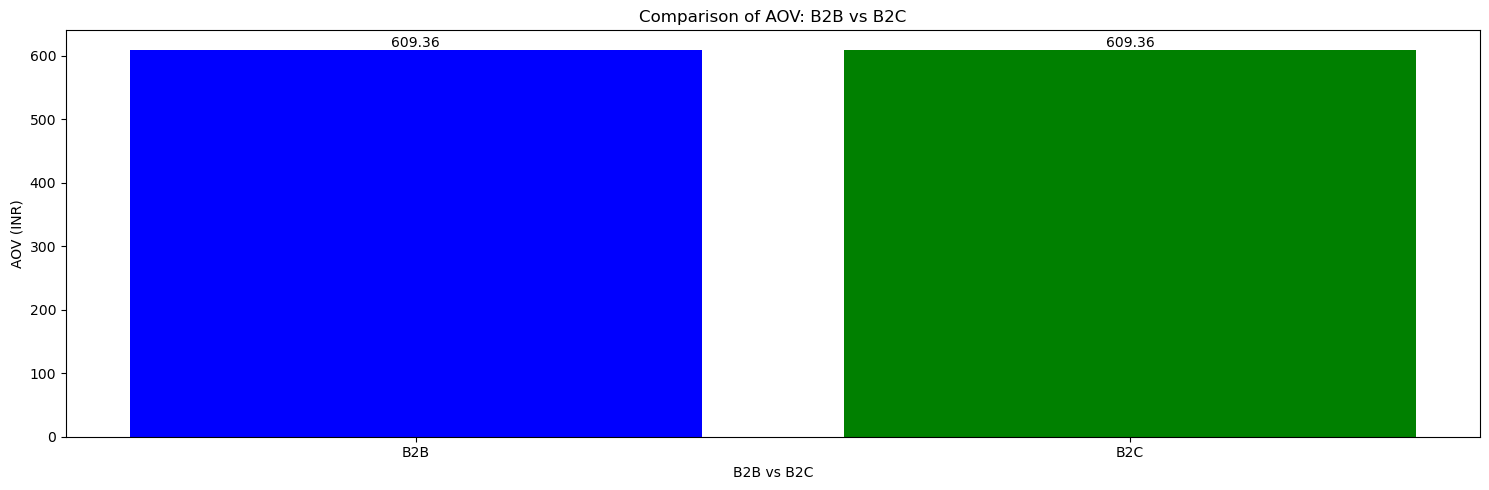

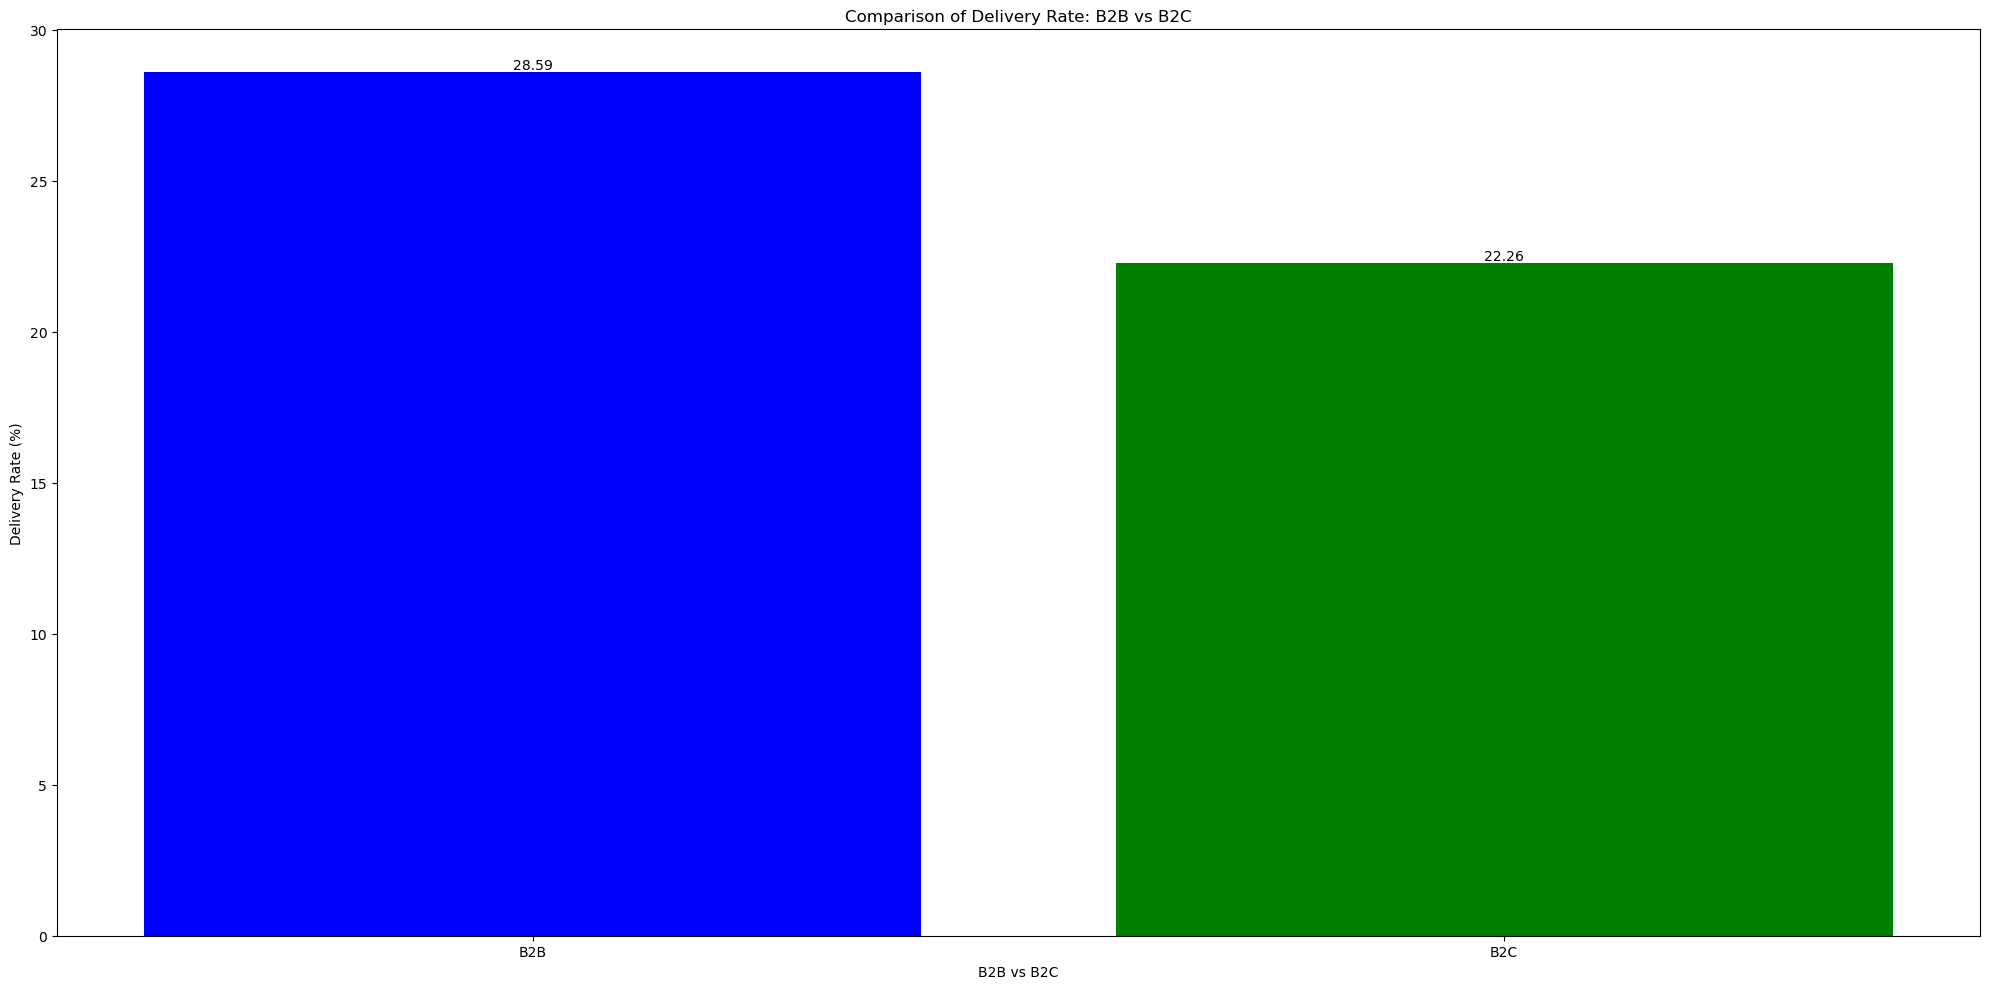

In [94]:
plt.figure(figsize=(15, 5))
plt.bar(['B2B', 'B2C'], [aov_b2b, aov_b2c], color=['blue', 'green'])
plt.xlabel('B2B vs B2C')
plt.ylabel('AOV (INR)')
plt.title('Comparison of AOV: B2B vs B2C')

# Menambahkan nilai di atas batang pada grafik AOV
for i, v in enumerate([aov_b2b, aov_b2c]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Membuat grafik Delivery Rate
plt.figure(figsize=(20,10))
plt.bar(['B2B', 'B2C'], [delivery_b2b, delivery_b2c], color=['blue', 'green'])
plt.xlabel('B2B vs B2C')
plt.ylabel('Delivery Rate (%)')
plt.title('Comparison of Delivery Rate: B2B vs B2C')

# Menambahkan nilai di atas batang pada grafik Delivery Rate
for i, v in enumerate([delivery_b2b, delivery_b2c]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Q. Root Cause Pengembalian & Pembatalan
Output:
- Tabel Pareto: Reason | Count | Share kumulatif.
- Grafik Pareto.

In [96]:
df['Courier Status'].unique() #cek data awal

array([0, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

## Tabel Pareto

In [97]:
df_reason = df[['Courier Status', 'Status']] #digabungin
reason = df_reason['Courier Status'].value_counts() #hitung per kategori
reason_total = reason.sum() #ditotal

reason_pareto = reason.reset_index() #buat grafik pareto
reason_pareto.columns = ['Reason', 'Count']
reason_pareto['Cumulative Share'] = reason_pareto['Count'].cumsum() / reason_total * 100

reason_pareto #tabel


,Reason,Count,Cumulative Share
0,Shipped,109487,84.890095
1,0,6872,90.218259
2,Unshipped,6681,95.398333
3,Cancelled,5935,100.000000


## Grafik Pareto

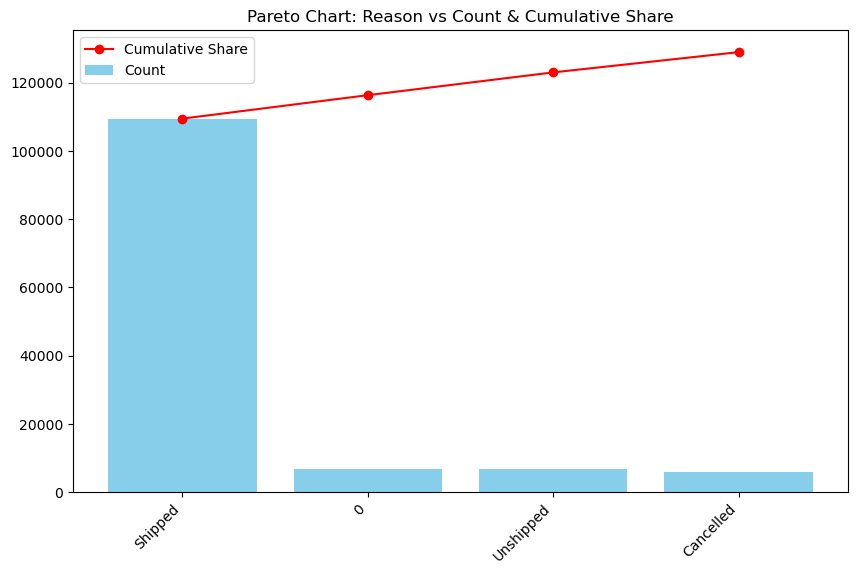

In [98]:
reason_pareto['Cumulative Share'] = reason_pareto['Count'].cumsum() #tambahan untuk pareto
reason_pareto['Reason'] = reason_pareto['Reason'].astype(str)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(reason_pareto['Reason'], reason_pareto['Count'], color='skyblue', label='Count')
plt.plot(reason_pareto['Reason'], reason_pareto['Cumulative Share'], color='red', marker='o', label='Cumulative Share')
plt.title('Pareto Chart: Reason vs Count & Cumulative Share')
plt.xticks(rotation=45, ha='right')  # Rotate x labels if needed for readability
plt.legend()
plt.show()


# R. Simple Time Cohort
Output: Tabel kohort Week0 | D+7 Delivery% | D+14 Return% | Catatan.

In [99]:
df['Date'].info #cek awal

<bound method Series.info of 0        2022-04-30
1        2022-04-30
2        2022-04-30
3        2022-04-30
4        2022-04-30
            ...    
128970   2022-05-31
128971   2022-05-31
128972   2022-05-31
128973   2022-05-31
128974   2022-05-31
Name: Date, Length: 128975, dtype: datetime64[ns]>

In [100]:
df['Order Week'] = df['Date'].dt.isocalendar().week #ubah jadi iso calender
df['Order Week'].nunique()

14

In [101]:
df['status_movement'] = df['Status'].apply(lambda x: 'Delivered' if 'Delivered' in x else ('Returned' if 'Returned' in x else 'Cancelled'))

# Fungsi untuk menghitung Delivery/Return/Cancel rate
def calculate_rates(group):
    # Filter status
    delivered = group[group['status_movement'] == 'Delivered']
    returned = group[group['status_movement'] == 'Returned']
    cancelled = group[group['status_movement'] == 'Cancelled']
    
    # Hitung Delivery, Return, Cancel rate D+7 & D+14
    delivery_rate_7 = len(delivered[delivered['Date'] <= group['Date'].max() + pd.Timedelta(days=7)]) / len(group) * 100
    return_rate_7 = len(returned[returned['Date'] <= group['Date'].max() + pd.Timedelta(days=7)]) / len(group) * 100
    cancel_rate_7 = len(cancelled[cancelled['Date'] <= group['Date'].max() + pd.Timedelta(days=7)]) / len(group) * 100
    
    delivery_rate_14 = len(delivered[delivered['Date'] <= group['Date'].max() + pd.Timedelta(days=14)]) / len(group) * 100
    return_rate_14 = len(returned[returned['Date'] <= group['Date'].max() + pd.Timedelta(days=14)]) / len(group) * 100
    cancel_rate_14 = len(cancelled[cancelled['Date'] <= group['Date'].max() + pd.Timedelta(days=14)]) / len(group) * 100

    return pd.Series({
        'D+7 Delivery%': delivery_rate_7,
        'D+7 Return%': return_rate_7,
        'D+7 Cancel%': cancel_rate_7,
        'D+14 Delivery%': delivery_rate_14,
        'D+14 Return%': return_rate_14,
        'D+14 Cancel%': cancel_rate_14,
    })

cohort_data = df.groupby('Order Week').apply(calculate_rates).reset_index()

# Menampilkan hasil
cohort_data.head(14)

C:\Users\FARUQ\AppData\Local\Temp\ipykernel_22832\1438754464.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cohort_data = df.groupby('Order Week').apply(calculate_rates).reset_index()


,Order Week,D+7 Delivery%,D+7 Return%,D+7 Cancel%,D+14 Delivery%,D+14 Return%,D+14 Cancel%
0,13,16.717823,1.125435,82.156742,16.717823,1.125435,82.156742
1,14,20.445434,1.496659,78.057906,20.445434,1.496659,78.057906
2,15,24.959619,1.878772,73.161608,24.959619,1.878772,73.161608
3,16,28.709278,2.094845,69.195876,28.709278,2.094845,69.195876
4,17,26.133792,1.873812,71.992396,26.133792,1.873812,71.992396
5,18,20.817626,1.047164,78.135210,20.817626,1.047164,78.135210
6,19,32.433384,2.523770,65.042845,32.433384,2.523770,65.042845
7,20,33.647343,2.415459,63.937198,33.647343,2.415459,63.937198
8,21,17.463547,1.345089,81.191364,17.463547,1.345089,81.191364
9,22,18.791946,1.332113,79.875941,18.791946,1.332113,79.875941


## Grafik Batang

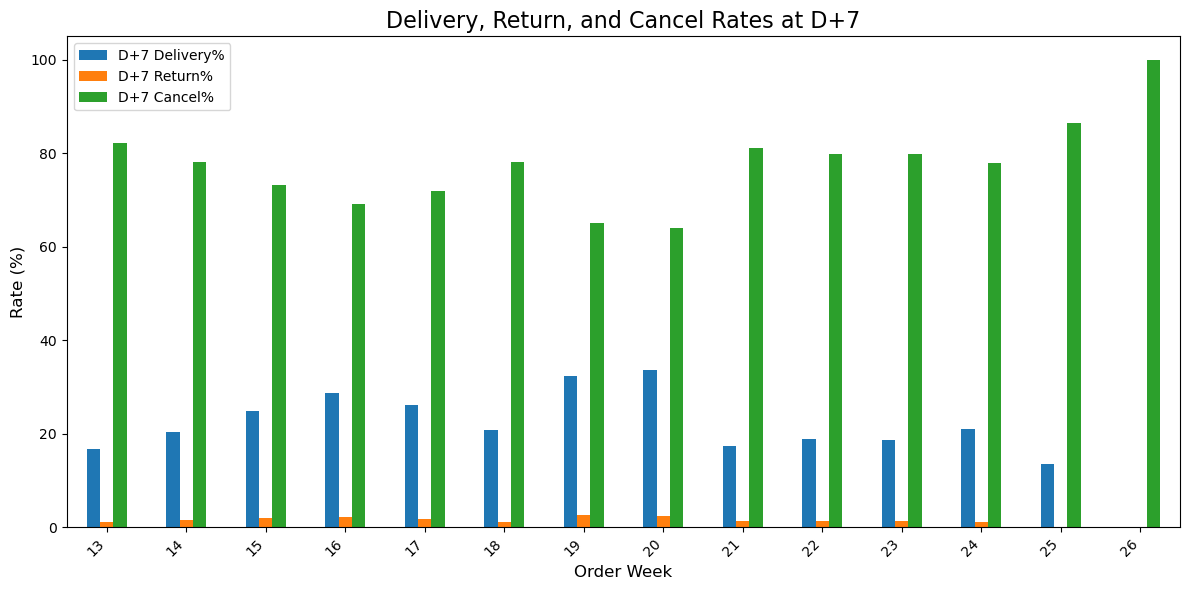

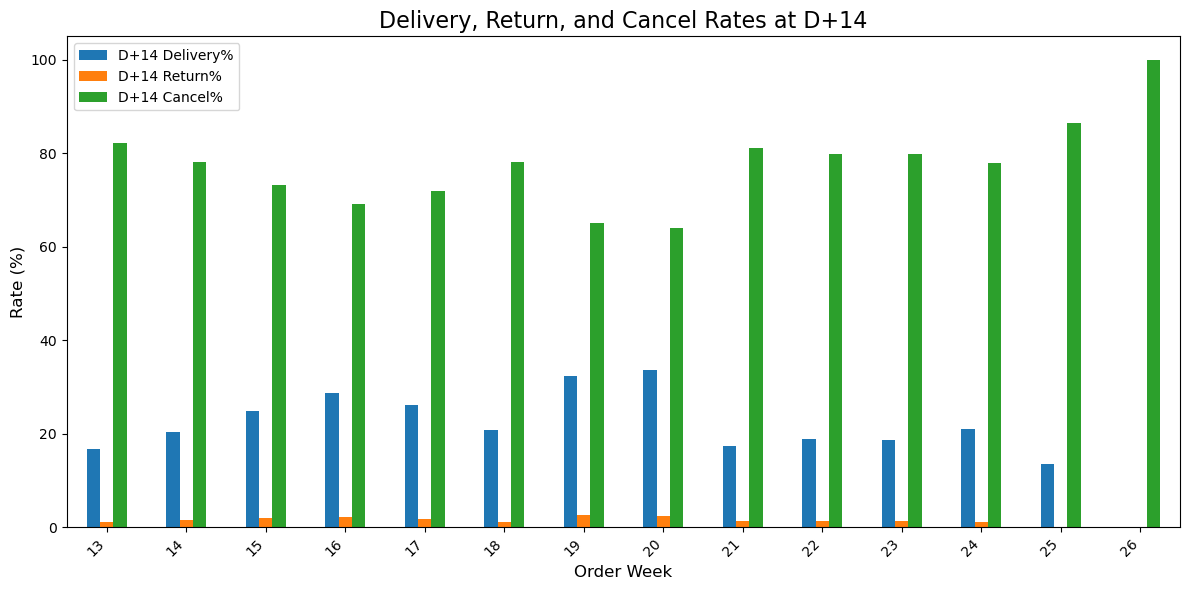

In [102]:
# Plotting the bar chart for Delivery, Return, and Cancel rates at D+7 and D+14
cohort_data.set_index('Order Week', inplace=True)

# Plotting D+7 Delivery, Return, and Cancel rates
fig, ax = plt.subplots(figsize=(12, 6))
cohort_data[['D+7 Delivery%', 'D+7 Return%', 'D+7 Cancel%']].plot(kind='bar', ax=ax)
ax.set_title('Delivery, Return, and Cancel Rates at D+7', fontsize=16)
ax.set_ylabel('Rate (%)', fontsize=12)
ax.set_xlabel('Order Week', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting D+14 Delivery, Return, and Cancel rates
fig, ax = plt.subplots(figsize=(12, 6))
cohort_data[['D+14 Delivery%', 'D+14 Return%', 'D+14 Cancel%']].plot(kind='bar', ax=ax)
ax.set_title('Delivery, Return, and Cancel Rates at D+14', fontsize=16)
ax.set_ylabel('Rate (%)', fontsize=12)
ax.set_xlabel('Order Week', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# S. Anomali & Weather
Output: Daftar tanggal anomali + grafik garis dengan penanda.

In [103]:
df['Date'].head #cek awal

<bound method NDFrame.head of 0        2022-04-30
1        2022-04-30
2        2022-04-30
3        2022-04-30
4        2022-04-30
            ...    
128970   2022-05-31
128971   2022-05-31
128972   2022-05-31
128973   2022-05-31
128974   2022-05-31
Name: Date, Length: 128975, dtype: datetime64[ns]>

## Tambahan : Function rata-rata dan standar deviasi

In [104]:
df['Amount'] = df['Amount'].replace({'\$': '', ',': ''}, regex=True)
df['Amount'].isnull().sum()
df['Amount'] = pd.to_numeric(df['Amount'],errors='coerce')
df['Advanced_Amount'] = df['Amount'].fillna(0)
df['Advanced_Amount'].isna().sum()

np.int64(0)

In [105]:
def rata_rata(data):
    return np.nanmean(data)  
    
def standar_deviasi(data):
    return np.nanstd(data) 

standar_deviasi(df['Advanced_Amount'])

np.float64(313.3459322208035)

## Tabel Anomali

In [106]:
mean_qty = df['Qty'].mean()  # Menghitung rata-rata qty
std_qty = df['Qty'].std()    # Menghitung standar deviasi qty

outliers_qty_hi = df[df['Qty'] > (mean_qty + 3 * std_qty)] #lebih besar
outliers_qty_low = df[df['Qty'] < (mean_qty + 3 * std_qty)] #lebih kecil
outliers_qty = pd.concat([outliers_qty_hi, outliers_qty_low]) #digabungin

In [107]:
#hitung IQR (Interquartille Range)
Q1_qty = df['Qty'].quantile(0.25)  
Q3_qty = df['Qty'].quantile(0.75)  
IQR_qty = df['Qty'].quantile(0.5)

#cari lower sama high
low_bound_qty = Q1_qty - 1.5 * IQR_qty   
hi_bound_qty = Q3_qty + 1.5 * IQR_qty  

outliers_iqr = df[(df['Qty'] < low_bound_qty) | (df['Qty'] > hi_bound_qty)]

In [108]:
#gabungin 2 sintaks di atas
outliers = pd.concat([outliers_qty, outliers_iqr]).drop_duplicates()
outliers[['Date', 'Qty', 'Amount']].head() #ahsil

,Date,Qty,Amount
265,2022-04-30,2,2130.0
647,2022-04-30,2,2224.0
937,2022-04-30,15,0.0
1018,2022-04-30,2,1518.0
1057,2022-04-30,2,0.0


## Grafik

In [ ]:
[outliers = pd.concat([outliers_qty, outliers_iqr]).drop_duplicates()
outliers[['Date', 'Qty', 'Amount']].head()

plt.figure(figsize=(10,6))
plt.scatter(outliers['Date'], outliers['Qty'], color='red', label='Anomali')

for i in range(1, len(outliers)):
    plt.plot([outliers['Date'].iloc[i-1], outliers['Date'].iloc[i]], 
             [outliers['Qty'].iloc[i-1], outliers['Qty'].iloc[i]], 
             color='gray', linestyle='--')

plt.title('Deteksi Anomali Kuantitas Harian')
plt.xlabel('Tanggal')
plt.ylabel('Kuantitas')

# Menentukan lokasi legenda secara manual
plt.legend(loc='upper right')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
]

# T. Naive Forecast
Output: Tabel tanggal | forecast_GMV + grafik garis (actual vs forecast pada periode t‑7).

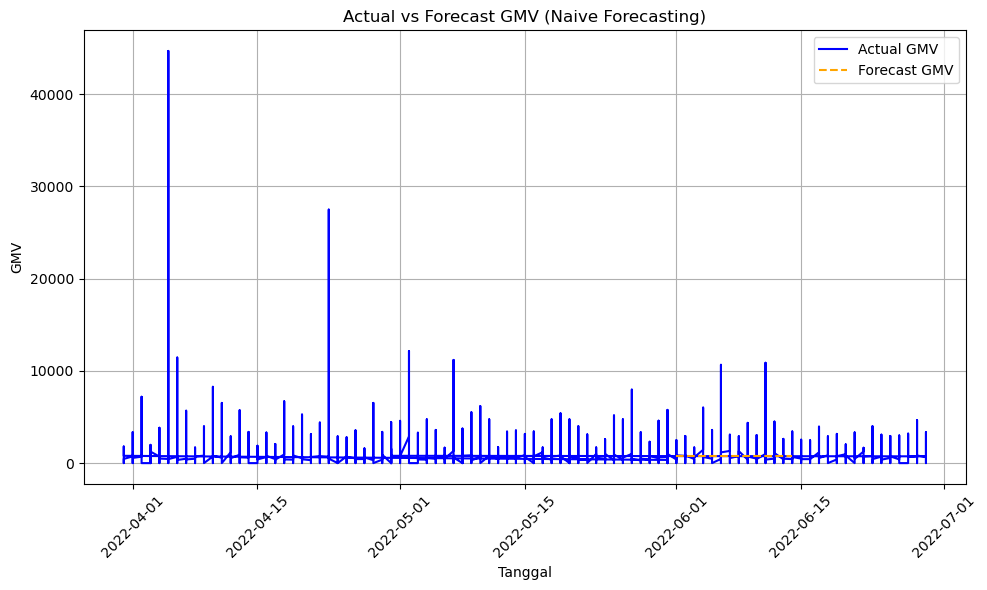

In [109]:
# Menghitung GMV dengan mengalikan Qty dan Amount
df['GMV'] = df['Qty'] * df['Amount']

# Pastikan index adalah datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')
df.set_index('Date', inplace=True)

# Langkah 1: Menghitung Rata-rata Bergerak 7 Hari (untuk forecasting)
df['7_day_avg'] = df['GMV'].rolling(window=7).mean()

# Langkah 2: Forecast dengan menggunakan data hari yang sama minggu lalu
df['forecast_GMV'] = df['GMV'].shift(7)  # Mengambil GMV untuk hari yang sama minggu lalu

# Langkah 3: Forecast untuk 2 minggu ke depan
# Pastikan df.index[-1] adalah tipe datetime
last_date = df.index[-1]  # Ambil tanggal terakhir
forecast_period = pd.date_range(last_date + pd.Timedelta(days=1), periods=14, freq='D')  # Menambahkan 1 hari ke tanggal terakhir
forecast_GMV = df['GMV'].iloc[-7:].mean()  # Rata-rata GMV 7 hari terakhir untuk prakiraan
forecast_df = pd.DataFrame({
    'Date': forecast_period,
    'forecast_GMV': [forecast_GMV] * 14  # Forecast yang sama untuk 14 hari ke depan
})

# Gabungkan hasil forecast dengan data GMV sebelumnya
combined_df = pd.concat([df[['GMV']], forecast_df.set_index('Date')])

# Langkah 4: Visualisasi actual vs forecast
plt.figure(figsize=(10,6))
plt.plot(df.index, df['GMV'], label='Actual GMV', color='blue')
plt.plot(forecast_df['Date'], forecast_df['forecast_GMV'], label='Forecast GMV', color='orange', linestyle='--')
plt.title('Actual vs Forecast GMV (Naive Forecasting)')
plt.xlabel('Tanggal')
plt.ylabel('GMV')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
